In [1]:
# Import everything and tests to see if it works

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, classification_report
from Value import Value
from activation import * 
from init import *
from Layer import Layer
from FFNN import FFNN
from loss import *
from visualize import plot_training_comparison, plot_weight_distribution
from draw_FFNN import visualize_FFNN
import matplotlib.pyplot as plt

def one_hot_encode(y, num_classes=10):
    """
    Converts an array of labels into one-hot encoding.
    y: array with shape (n_samples, 1) or (n_samples,)
    """
    y = y.flatten().astype(int)
    one_hot = np.zeros((y.shape[0], num_classes))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

def decode_one_hot(y_onehot):
    """Convert one-hot encoded labels back to class indices."""
    return np.argmax(y_onehot, axis=1)

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X = X.astype(np.float32) / 255.0
y = y.astype(np.int32)

y_onehot = one_hot_encode(y, num_classes=10)

X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

X_train = Value(X_train)
y_train = Value(y_train)
X_val = Value(X_val)
y_val = Value(y_val)

Training model Without RMSNorm
Accuracy Without RMSNorm: 95.89%

Training model With RMSNorm
Accuracy With RMSNorm: 95.91%



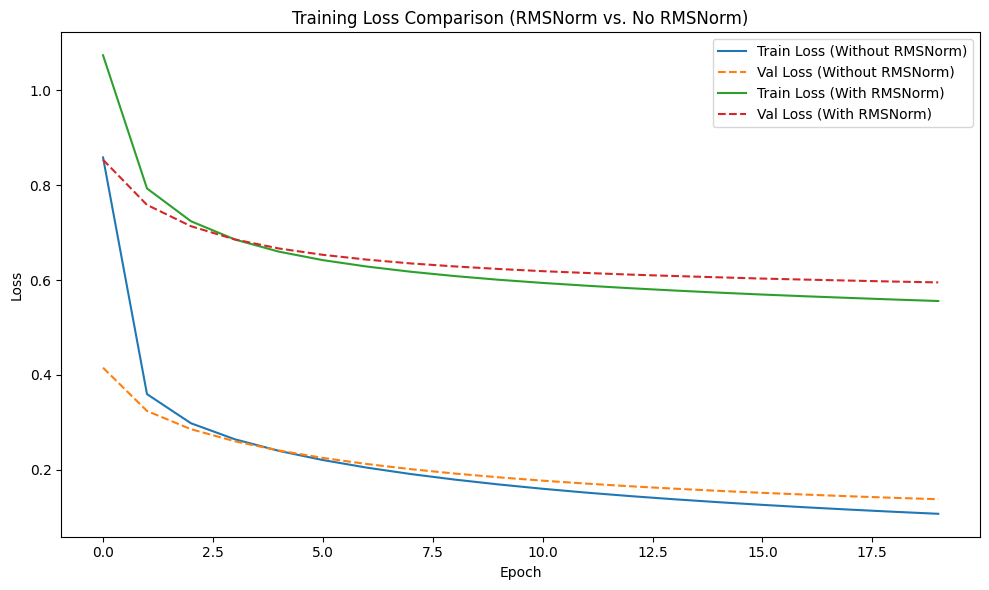

Weight and gradient distribution: Without RMSNorm


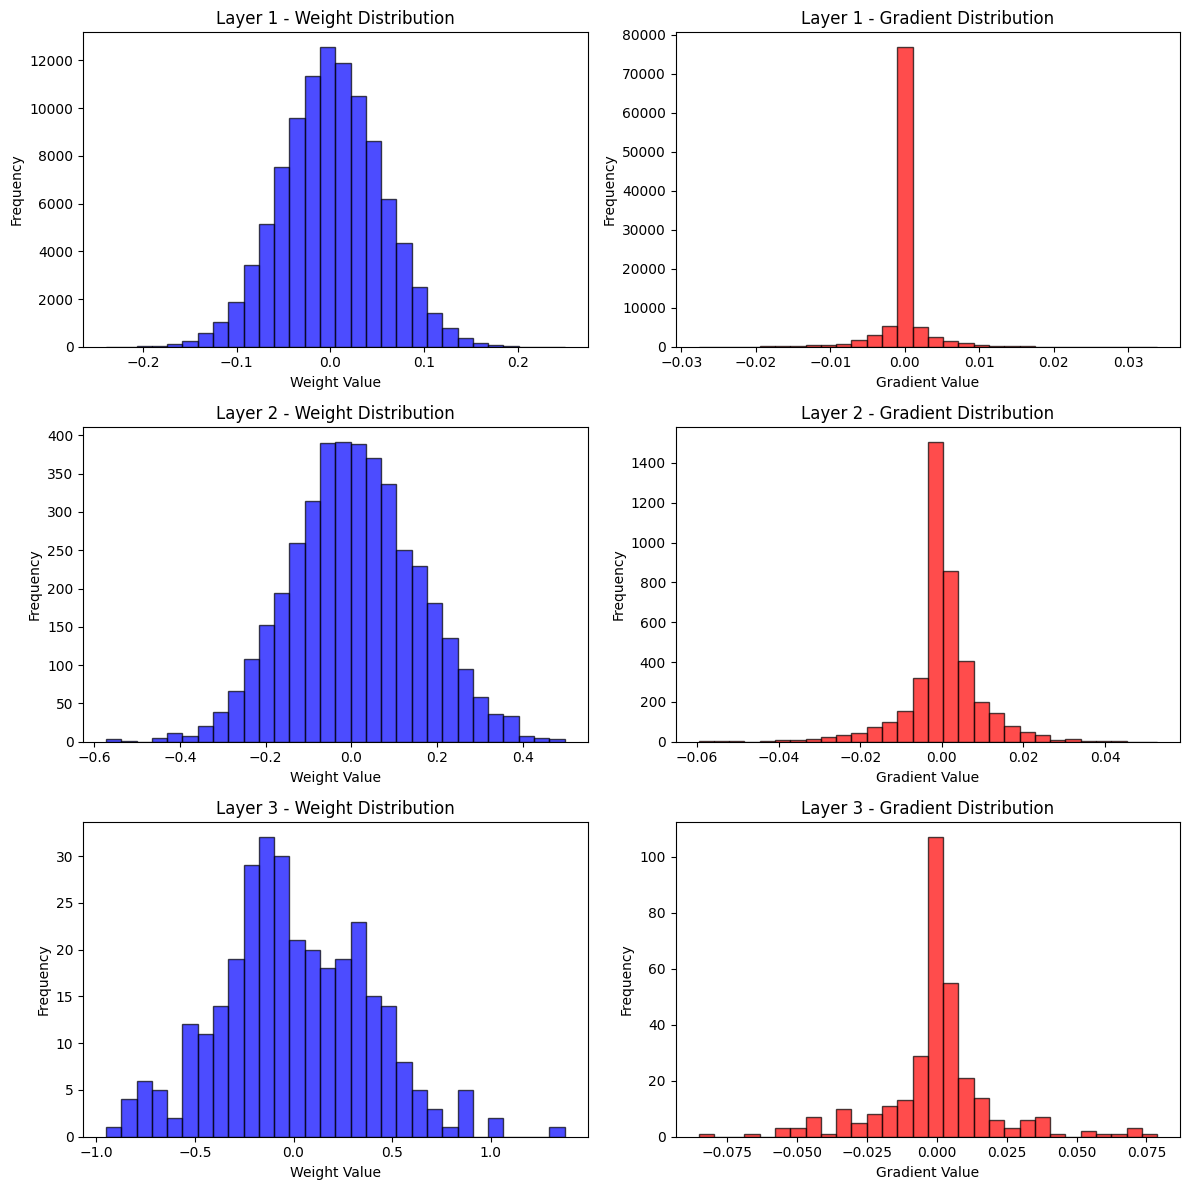

Weight and gradient distribution: With RMSNorm


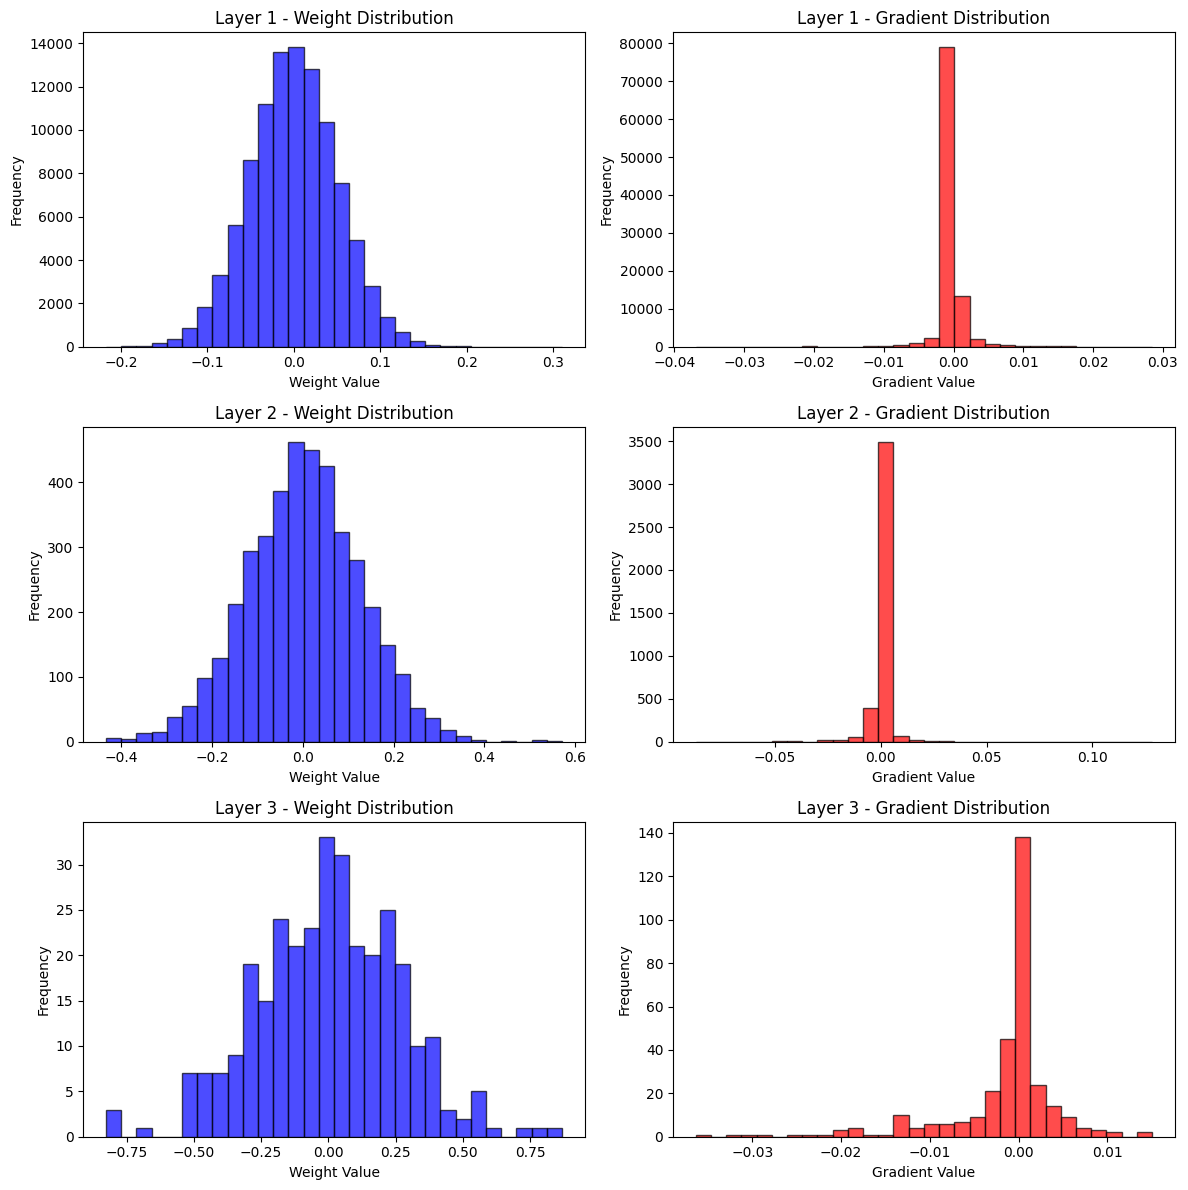

In [2]:
models = []
training_histories = []
accuracies = []

for use_rmsnorm in [False, True]:
    label = "With RMSNorm" if use_rmsnorm else "Without RMSNorm"
    print(f"Training model {label}")

    layers = [
        Layer(784, 128, activation=relu, weight_init=he_init, rmsnorm=use_rmsnorm),
        Layer(128, 32, activation=relu, weight_init=he_init, rmsnorm=use_rmsnorm),
        Layer(32, 10, activation=softmax, weight_init=he_init, rmsnorm=use_rmsnorm),
    ]

    model = FFNN(layers=layers, loss_fn=cce_loss, lr=0.01)

    training_history = model.train(
        training_data=X_train,
        training_target=y_train,
        max_epoch=20,
        error_threshold=0.01,
        batch_size=64,
        validation_data=X_val,
        validation_target=y_val,
        verbose=False
    )

    models.append(model)
    training_histories.append(training_history)

    pred = model(X_val)
    pred = np.argmax(pred.data, axis=1)
    y_val_decoded = np.argmax(y_val.data, axis=1)

    accuracy = accuracy_score(y_val_decoded, pred)
    accuracies.append(accuracy)

    print(f"Accuracy {label}: {accuracy * 100:.2f}%\n")

plt.figure(figsize=(10, 6))

for i, label in enumerate(["Without RMSNorm", "With RMSNorm"]):
    plt.plot(training_histories[i]['training_loss_history'], label=f'Train Loss ({label})')
    plt.plot(training_histories[i]['validation_loss_history'], linestyle='--', label=f'Val Loss ({label})')

plt.title('Training Loss Comparison (RMSNorm vs. No RMSNorm)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

for i, model in enumerate(models):
    print(f"Weight and gradient distribution: {'With RMSNorm' if i else 'Without RMSNorm'}")
    plot_weight_distribution(model)

Epoch 1/20: Training Loss = 0.8133433236905506, Validation Loss = 0.4162231490068098
Epoch 2/20: Training Loss = 0.3560803014210292, Validation Loss = 0.3204110008447084
Epoch 3/20: Training Loss = 0.2938235008290836, Validation Loss = 0.28187149928984306
Epoch 4/20: Training Loss = 0.2608272945710591, Validation Loss = 0.2574723987371839
Epoch 5/20: Training Loss = 0.23717853675995554, Validation Loss = 0.23905097228312258
Epoch 6/20: Training Loss = 0.21822208152924266, Validation Loss = 0.22390446082192816
Epoch 7/20: Training Loss = 0.20226897888524192, Validation Loss = 0.21099661806158812
Epoch 8/20: Training Loss = 0.18834941925747054, Validation Loss = 0.1998443135268799
Epoch 9/20: Training Loss = 0.17612205748472895, Validation Loss = 0.1899633050820079
Epoch 10/20: Training Loss = 0.16532442377507686, Validation Loss = 0.18122311026036847
Epoch 11/20: Training Loss = 0.15568279836007526, Validation Loss = 0.17347186256173777
Epoch 12/20: Training Loss = 0.14700963967399938, 

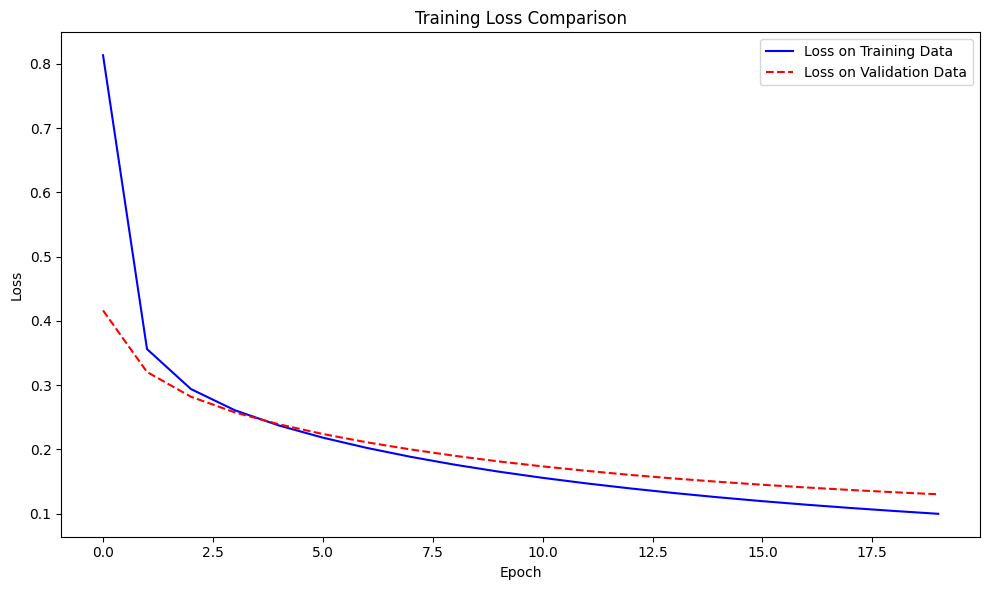

Accuracy: 96.25%
Log Loss: 0.1301
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.97      0.98      0.98      1600
           2       0.96      0.95      0.96      1380
           3       0.97      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.96      0.96      0.96      1273
           6       0.96      0.98      0.97      1396
           7       0.97      0.96      0.97      1503
           8       0.95      0.95      0.95      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



In [5]:
layers = [
    Layer(784, 128, activation=relu, weight_init=he_init),
    Layer(128, 32, activation=relu, weight_init=he_init),
    Layer(32, 10, activation=softmax, weight_init=he_init)
]

model = FFNN(layers=layers, loss_fn=cce_loss, lr=0.01)

training_history = model.train(
    training_data=X_train,
    training_target=y_train,
    max_epoch=20,
    error_threshold=0.01,
    batch_size=64,
    validation_data=X_val,
    validation_target=y_val,
    verbose=True
)

plot_training_comparison(training_history)

predictions = model(X_val)
pred_labels = np.argmax(predictions.data, axis=1)

y_val_labels = decode_one_hot(y_val.data)

accuracy = accuracy_score(y_val_labels, pred_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

logloss = log_loss(y_val_labels, predictions.data)
print(f"Log Loss: {logloss:.4f}")

report = classification_report(y_val_labels, pred_labels)
print("Classification Report:\n", report)

Depth Shallow (2 layers) - Accuracy: 95.01%
Depth Medium (3 layers) - Accuracy: 96.20%
Depth Deep (4 layers) - Accuracy: 96.48%


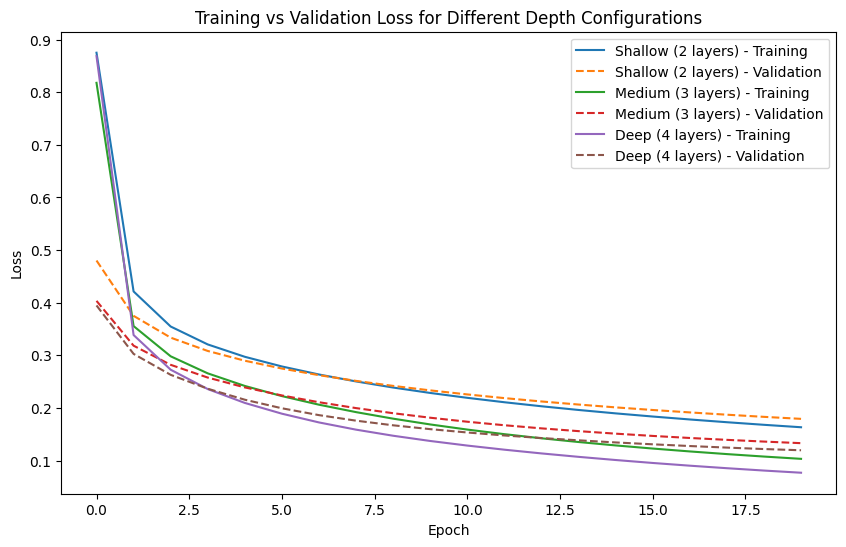


Final Accuracy Results for Depth Variation:
Shallow (2 layers): 95.01%
Medium (3 layers): 96.20%
Deep (4 layers): 96.48%


In [2]:
depth_variations = {
    "Shallow (2 layers)": [
        Layer(784, 128, activation=relu, weight_init=he_init),
        Layer(128, 10, activation=softmax, weight_init=he_init)
    ],
    "Medium (3 layers)": [
        Layer(784, 128, activation=relu, weight_init=he_init),
        Layer(128, 64, activation=relu, weight_init=he_init),
        Layer(64, 10, activation=softmax, weight_init=he_init)
    ],
    "Deep (4 layers)": [
        Layer(784, 128, activation=relu, weight_init=he_init),
        Layer(128, 64, activation=relu, weight_init=he_init),
        Layer(64, 32, activation=relu, weight_init=he_init),
        Layer(32, 10, activation=softmax, weight_init=he_init)
    ]
}

depth_results = {}

plt.figure(figsize=(10, 6))

for depth_label, layers in depth_variations.items():
    model = FFNN(layers=layers, loss_fn=cce_loss, lr=0.01)

    training_history = model.train(
        training_data=X_train,
        training_target=y_train,
        max_epoch=20,
        error_threshold=0.01,
        batch_size=64,
        validation_data=X_val,
        validation_target=y_val,
        verbose=False
    )

    plt.plot(
        training_history['training_loss_history'], label=f'{depth_label} - Training', linestyle='-'
    )
    plt.plot(
        training_history['validation_loss_history'], label=f'{depth_label} - Validation', linestyle='--'
    )

    predictions = model(X_val)
    pred_labels = np.argmax(predictions.data, axis=1)
    y_val_labels = decode_one_hot(y_val.data)

    accuracy = accuracy_score(y_val_labels, pred_labels)
    depth_results[depth_label] = accuracy
    print(f"Depth {depth_label} - Accuracy: {accuracy * 100:.2f}%")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss for Different Depth Configurations")
plt.legend()
plt.show()

print("\nFinal Accuracy Results for Depth Variation:")
for key, value in depth_results.items():
    print(f"{key}: {value * 100:.2f}%")

Width Narrow (small neurons) - Accuracy: 95.69%
Width Medium (default neurons) - Accuracy: 96.15%
Width Wide (large neurons) - Accuracy: 96.47%


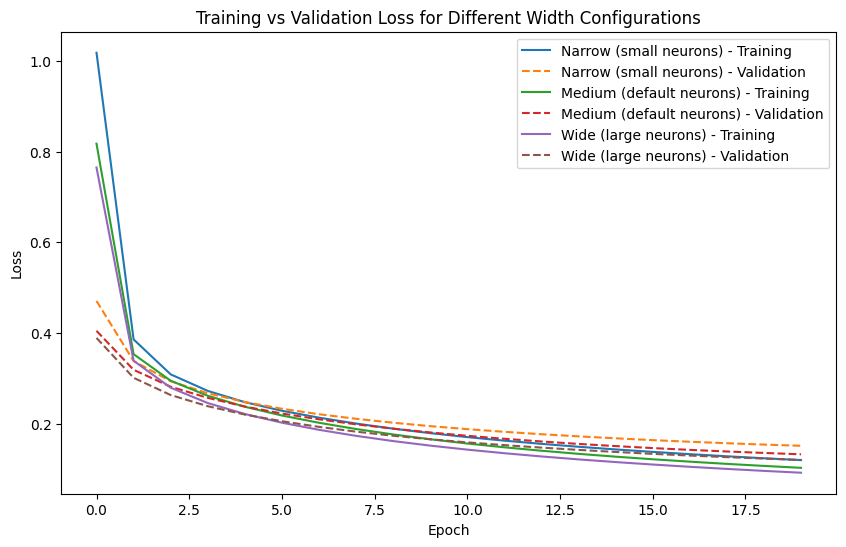


Final Accuracy Results for Width Variation:
Narrow (small neurons): 95.69%
Medium (default neurons): 96.15%
Wide (large neurons): 96.47%


In [3]:
width_variations = {
    "Narrow (small neurons)": [
        Layer(784, 64, activation=relu, weight_init=he_init),
        Layer(64, 32, activation=relu, weight_init=he_init),
        Layer(32, 10, activation=softmax, weight_init=he_init)
    ],
    "Medium (default neurons)": [
        Layer(784, 128, activation=relu, weight_init=he_init),
        Layer(128, 64, activation=relu, weight_init=he_init),
        Layer(64, 10, activation=softmax, weight_init=he_init)
    ],
    "Wide (large neurons)": [
        Layer(784, 256, activation=relu, weight_init=he_init),
        Layer(256, 128, activation=relu, weight_init=he_init),
        Layer(128, 10, activation=softmax, weight_init=he_init)
    ]
}

width_results = {}

plt.figure(figsize=(10, 6))

for width_label, layers in width_variations.items():
    model = FFNN(layers=layers, loss_fn=cce_loss, lr=0.01)

    training_history = model.train(
        training_data=X_train,
        training_target=y_train,
        max_epoch=20,
        error_threshold=0.01,
        batch_size=64,
        validation_data=X_val,
        validation_target=y_val,
        verbose=False
    )

    # Plot training loss and validation loss
    plt.plot(
        training_history['training_loss_history'], label=f'{width_label} - Training', linestyle='-'
    )
    plt.plot(
        training_history['validation_loss_history'], label=f'{width_label} - Validation', linestyle='--'
    )

    # Evaluate model
    predictions = model(X_val)
    pred_labels = np.argmax(predictions.data, axis=1)
    y_val_labels = decode_one_hot(y_val.data)

    accuracy = accuracy_score(y_val_labels, pred_labels)
    width_results[width_label] = accuracy
    print(f"Width {width_label} - Accuracy: {accuracy * 100:.2f}%")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss for Different Width Configurations")
plt.legend()
plt.show()

print("\nFinal Accuracy Results for Width Variation:")
for key, value in width_results.items():
    print(f"{key}: {value * 100:.2f}%")

Activation Linear - Accuracy: 91.91%
Activation Tanh - Accuracy: 94.09%
Activation ReLU - Accuracy: 94.91%
Activation Leaky ReLU - Accuracy: 95.05%
Activation Sigmoid - Accuracy: 86.02%
Activation Swish - Accuracy: 94.23%


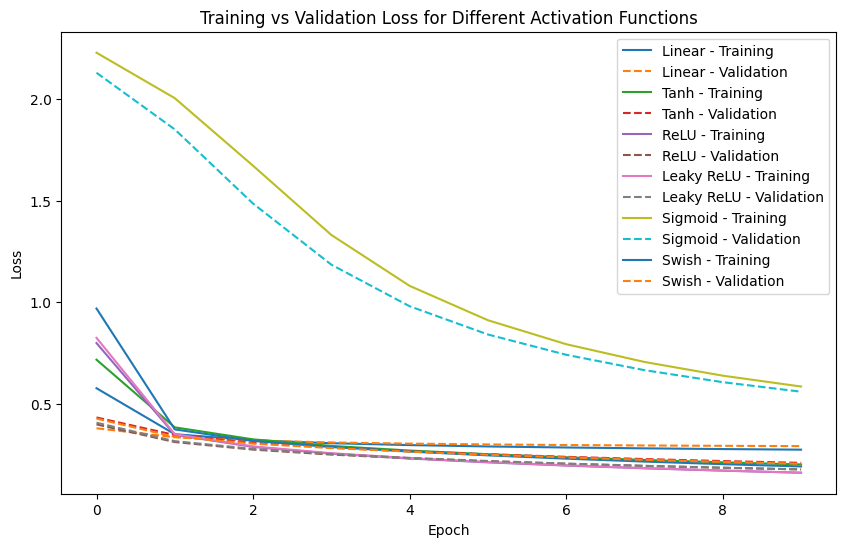


Final Accuracy Results for Activation Functions:
Linear: 91.91%
Tanh: 94.09%
ReLU: 94.91%
Leaky ReLU: 95.05%
Sigmoid: 86.02%
Swish: 94.23%

Weight Distribution for Linear


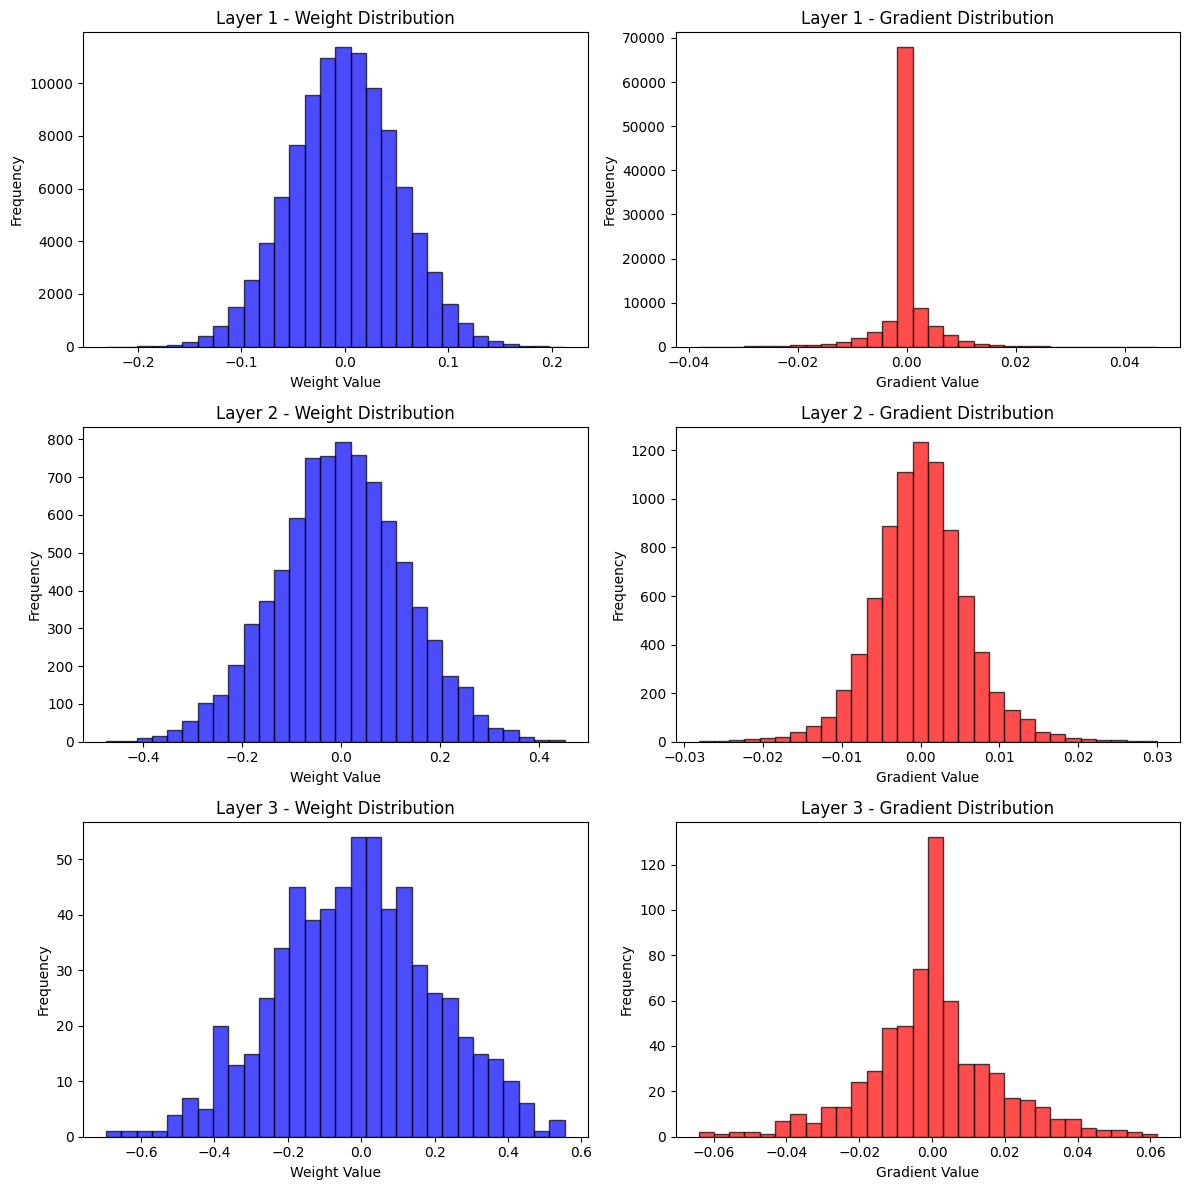


Weight Distribution for Tanh


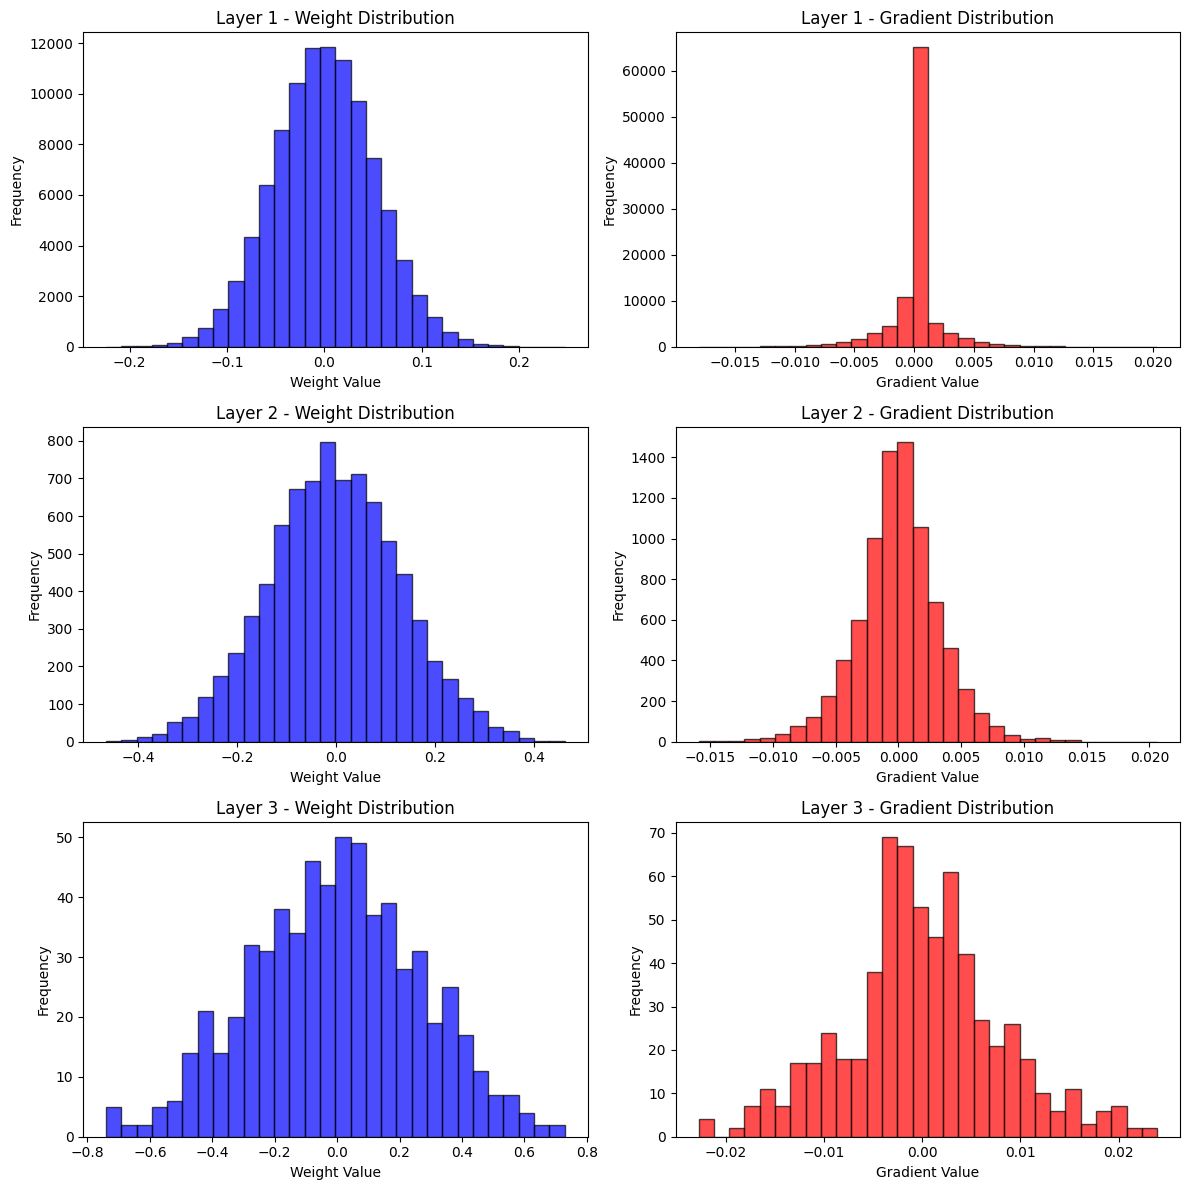


Weight Distribution for ReLU


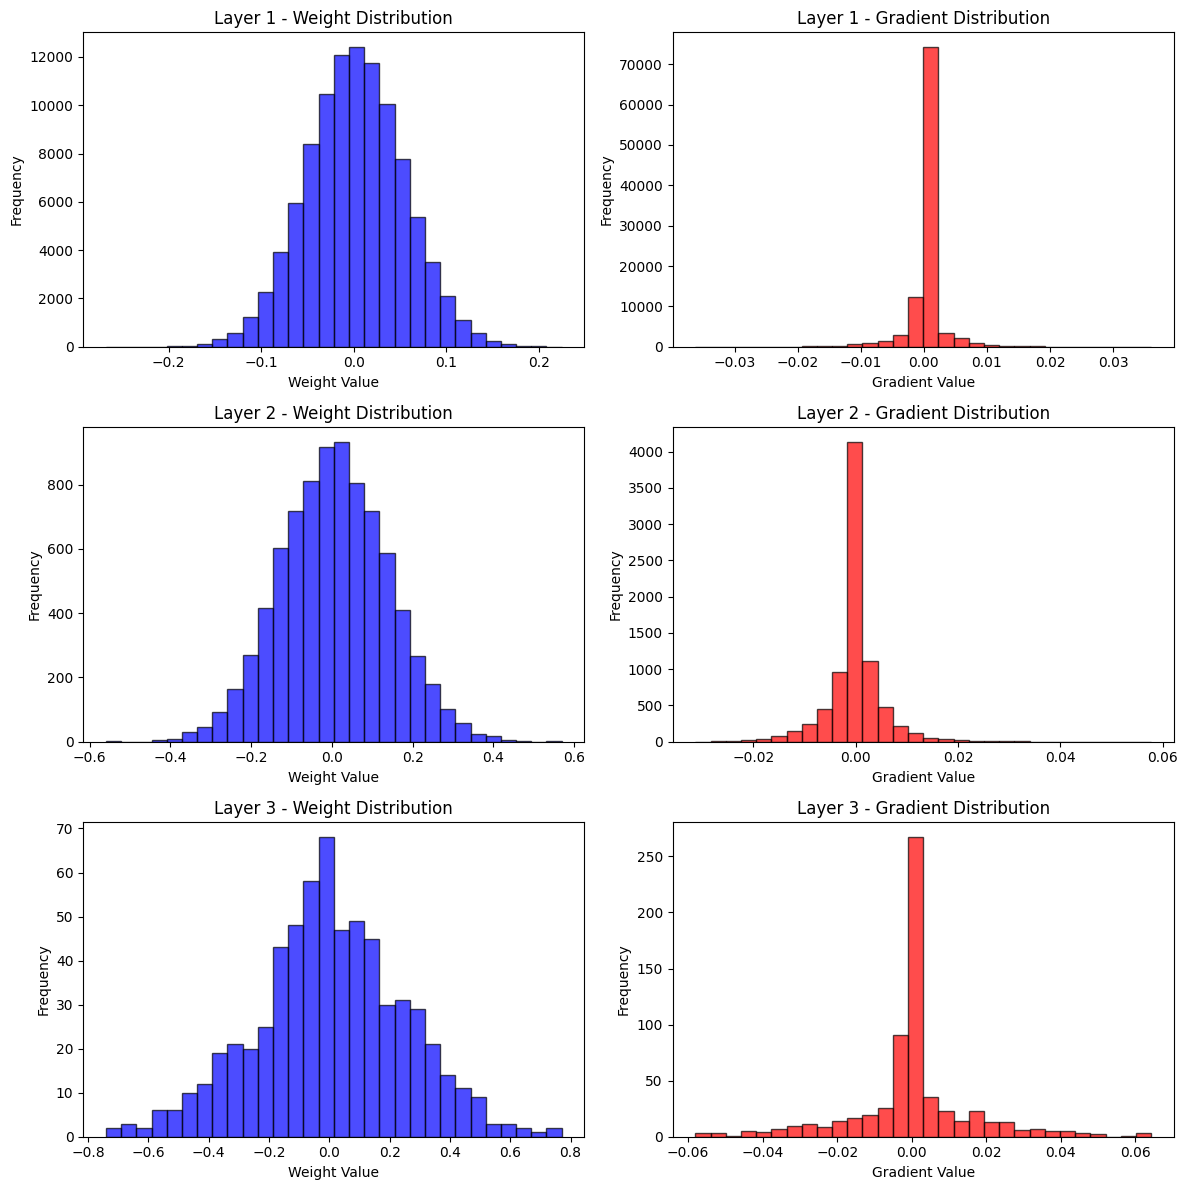


Weight Distribution for Leaky ReLU


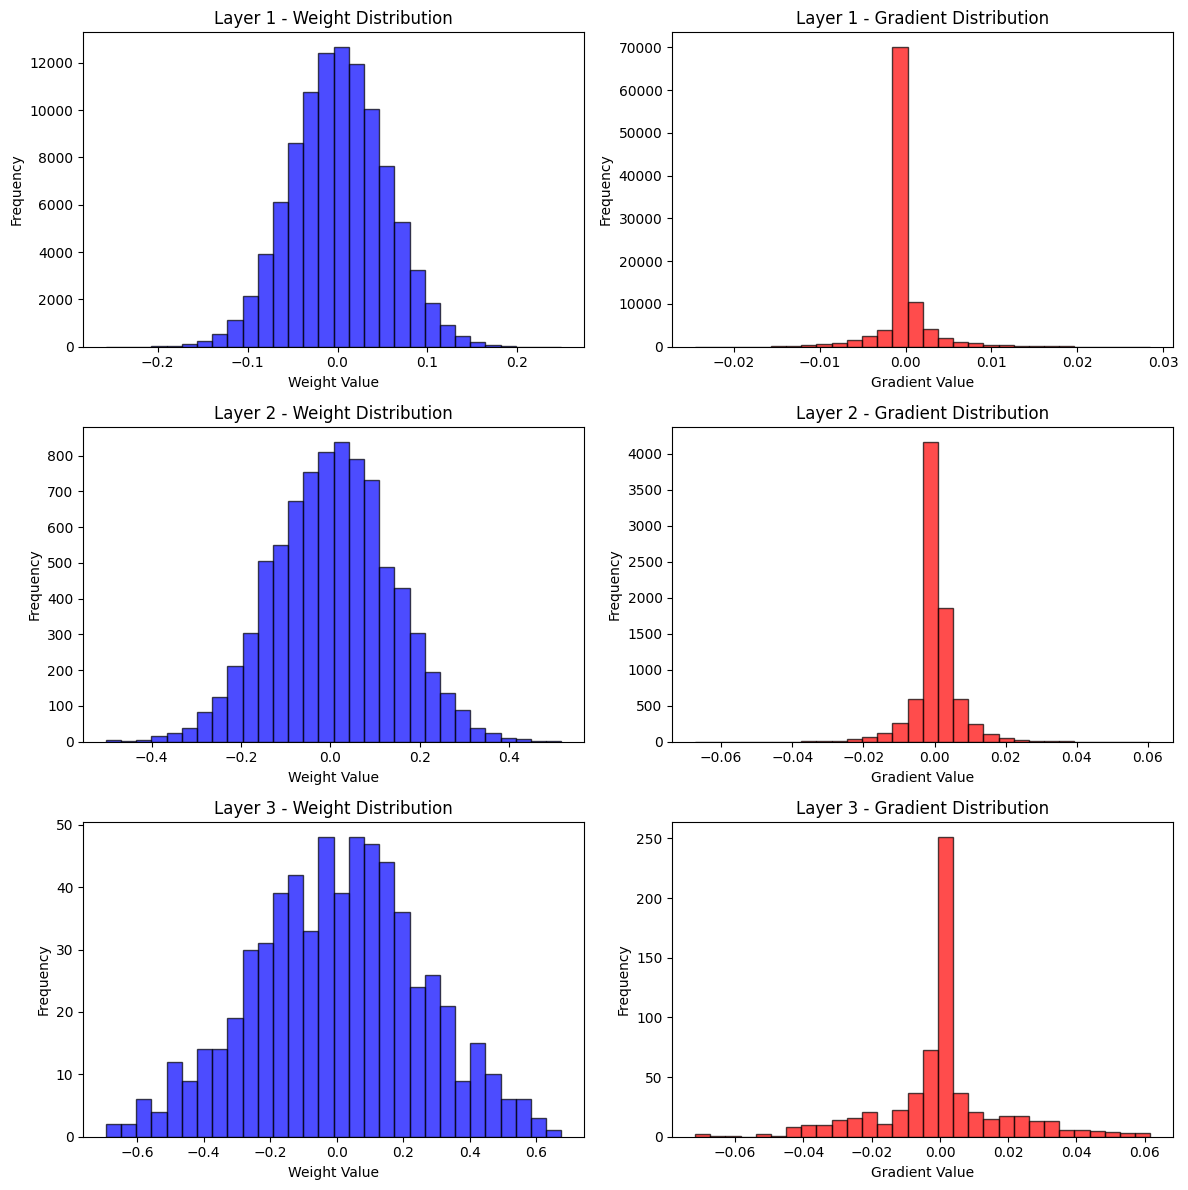


Weight Distribution for Sigmoid


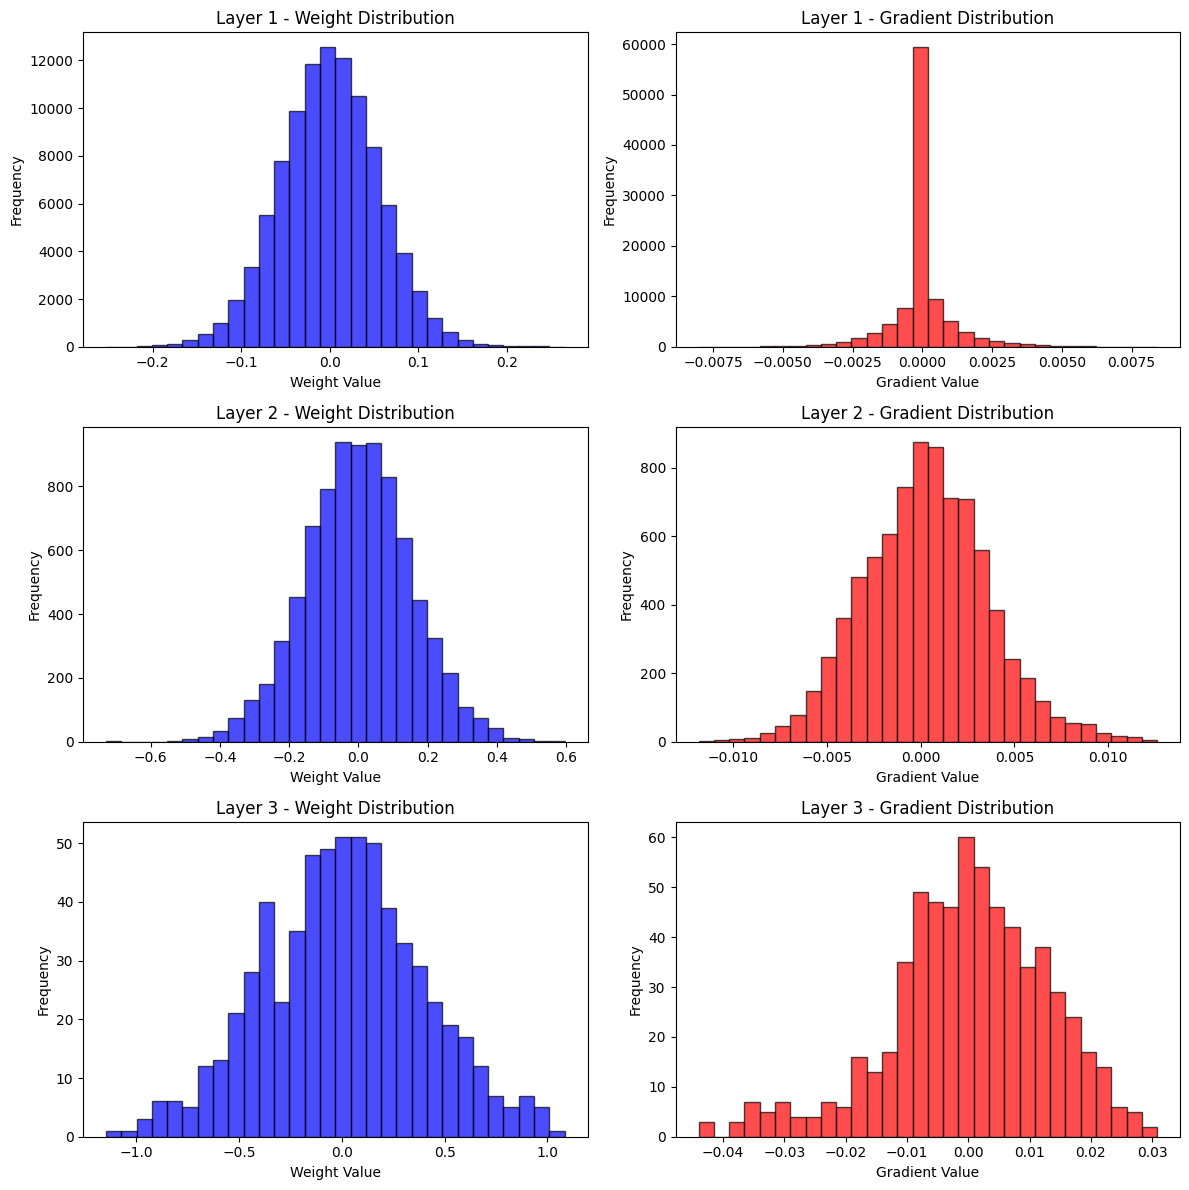


Weight Distribution for Swish


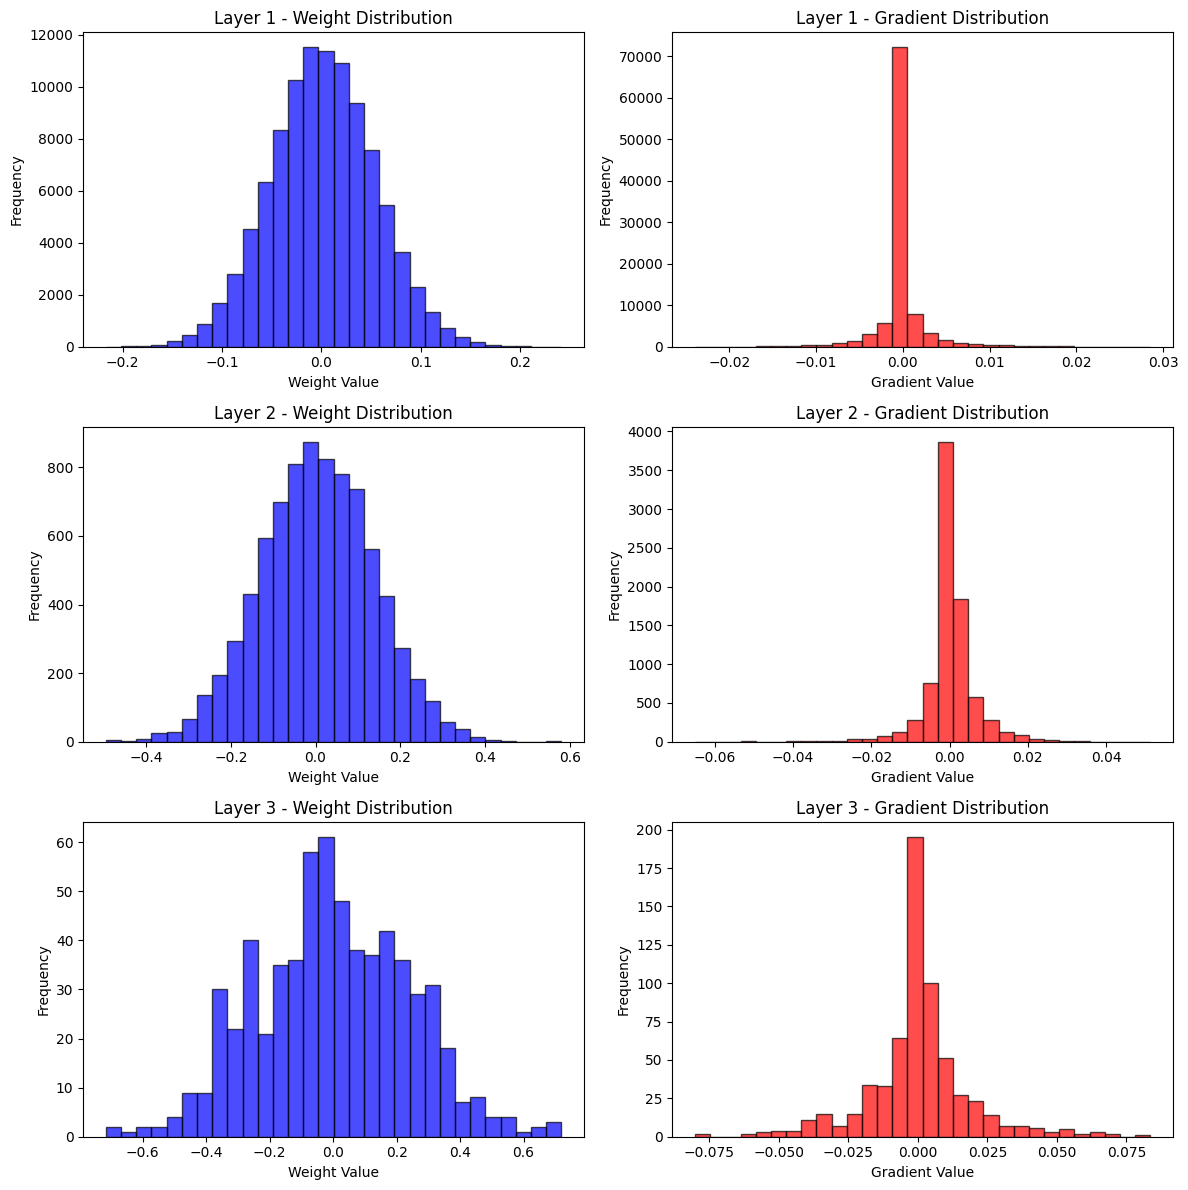

In [6]:
activation_variations = {
    "Linear": activations_map["linear"],
    "Tanh": activations_map["tanh"],
    "ReLU": activations_map["relu"],
    "Leaky ReLU": activations_map["leaky_relu"],
    "Sigmoid": activations_map["sigmoid"],
    "Swish": activations_map["swish"],
}

activation_results = {}
models_cached = {}

plt.figure(figsize=(10, 6))

for act_label, activation_fn in activation_variations.items():
    layers = [
        Layer(784, 128, activation=activation_fn, weight_init=he_init),
        Layer(128, 64, activation=activation_fn, weight_init=he_init),
        Layer(64, 10, activation=softmax, weight_init=he_init)
    ]
    
    model = FFNN(layers=layers, loss_fn=cce_loss, lr=0.01)

    training_history = model.train(
        training_data=X_train,
        training_target=y_train,
        max_epoch=10,
        error_threshold=0.01,
        batch_size=64,
        validation_data=X_val,
        validation_target=y_val,
        verbose=False
    )

    # Plot training loss and validation loss
    plt.plot(
        training_history['training_loss_history'], label=f'{act_label} - Training', linestyle='-'
    )
    plt.plot(
        training_history['validation_loss_history'], label=f'{act_label} - Validation', linestyle='--'
    )

    # Evaluate model
    predictions = model(X_val)
    pred_labels = np.argmax(predictions.data, axis=1)
    y_val_labels = decode_one_hot(y_val.data)

    accuracy = accuracy_score(y_val_labels, pred_labels)
    activation_results[act_label] = accuracy
    models_cached[act_label] = model
    print(f"Activation {act_label} - Accuracy: {accuracy * 100:.2f}%")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss for Different Activation Functions")
plt.legend()
plt.show()

print("\nFinal Accuracy Results for Activation Functions:")
for key, value in activation_results.items():
    print(f"{key}: {value * 100:.2f}%")

for act_label, model in models_cached.items():
    print(f"\nWeight Distribution for {act_label}")
    plot_weight_distribution(model)


Training model with learning rate: 0.001
Accuracy for lr=0.001: 91.01%

Training model with learning rate: 0.01
Accuracy for lr=0.01: 96.16%

Training model with learning rate: 0.1
Accuracy for lr=0.1: 97.58%



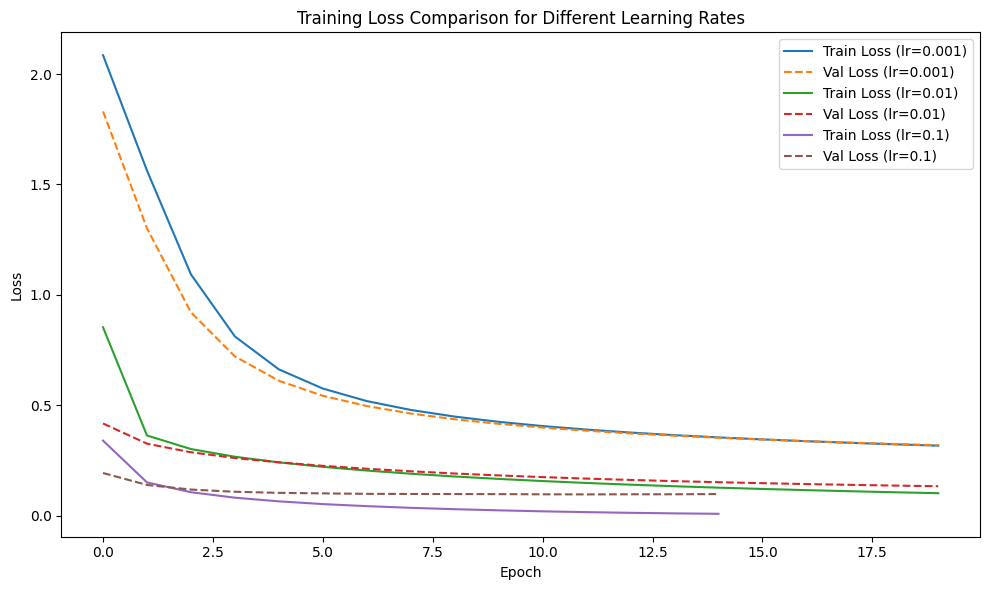

Weight and gradient distribution for learning rate: 0.001


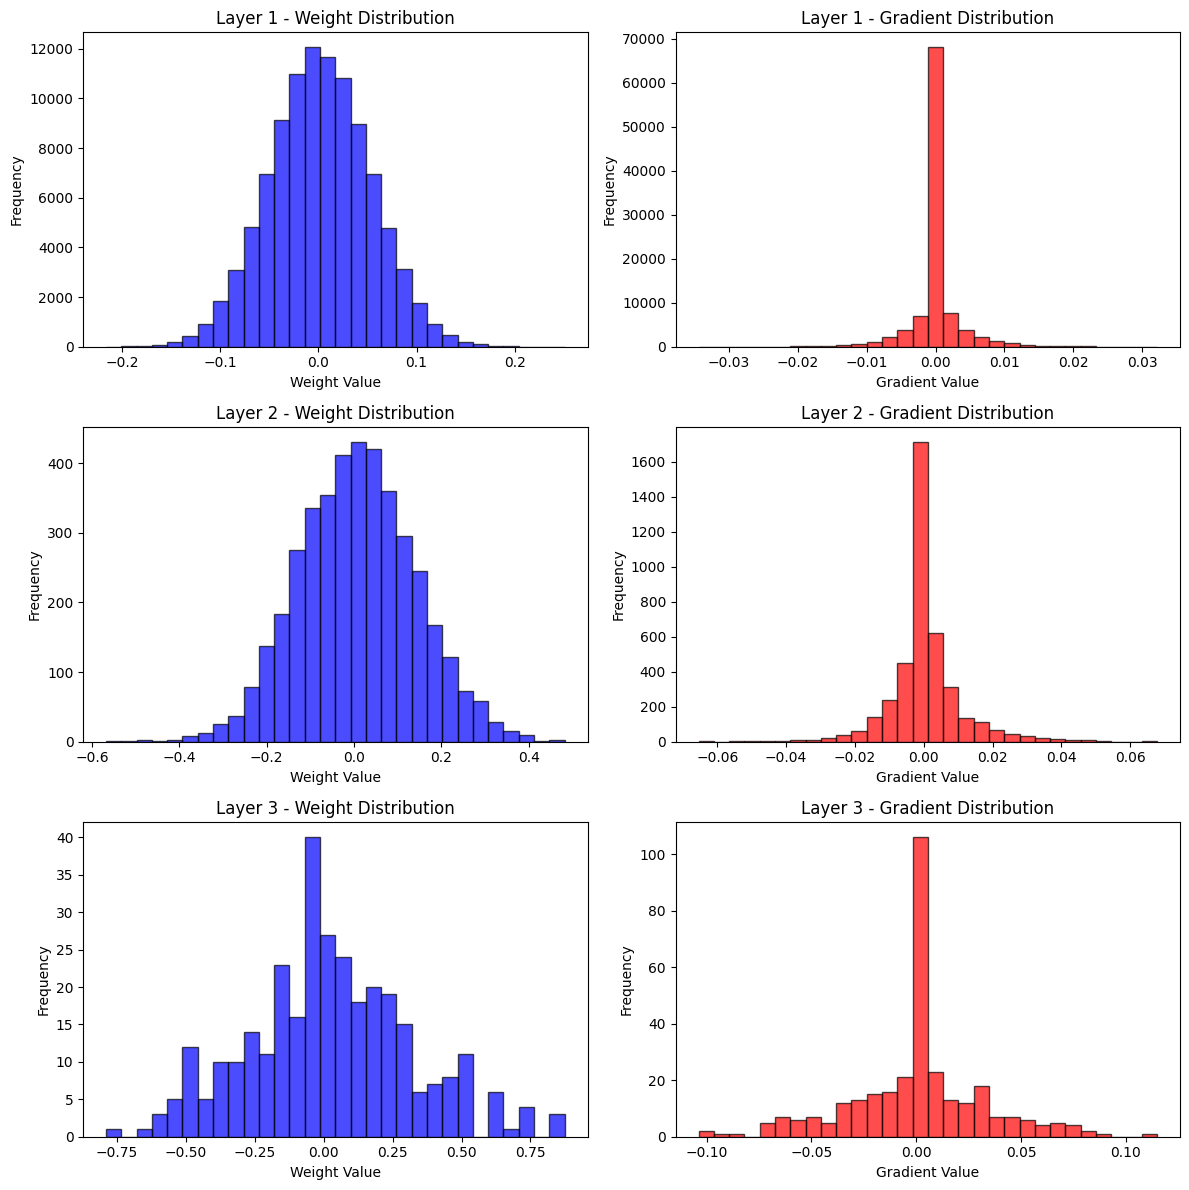

Weight and gradient distribution for learning rate: 0.01


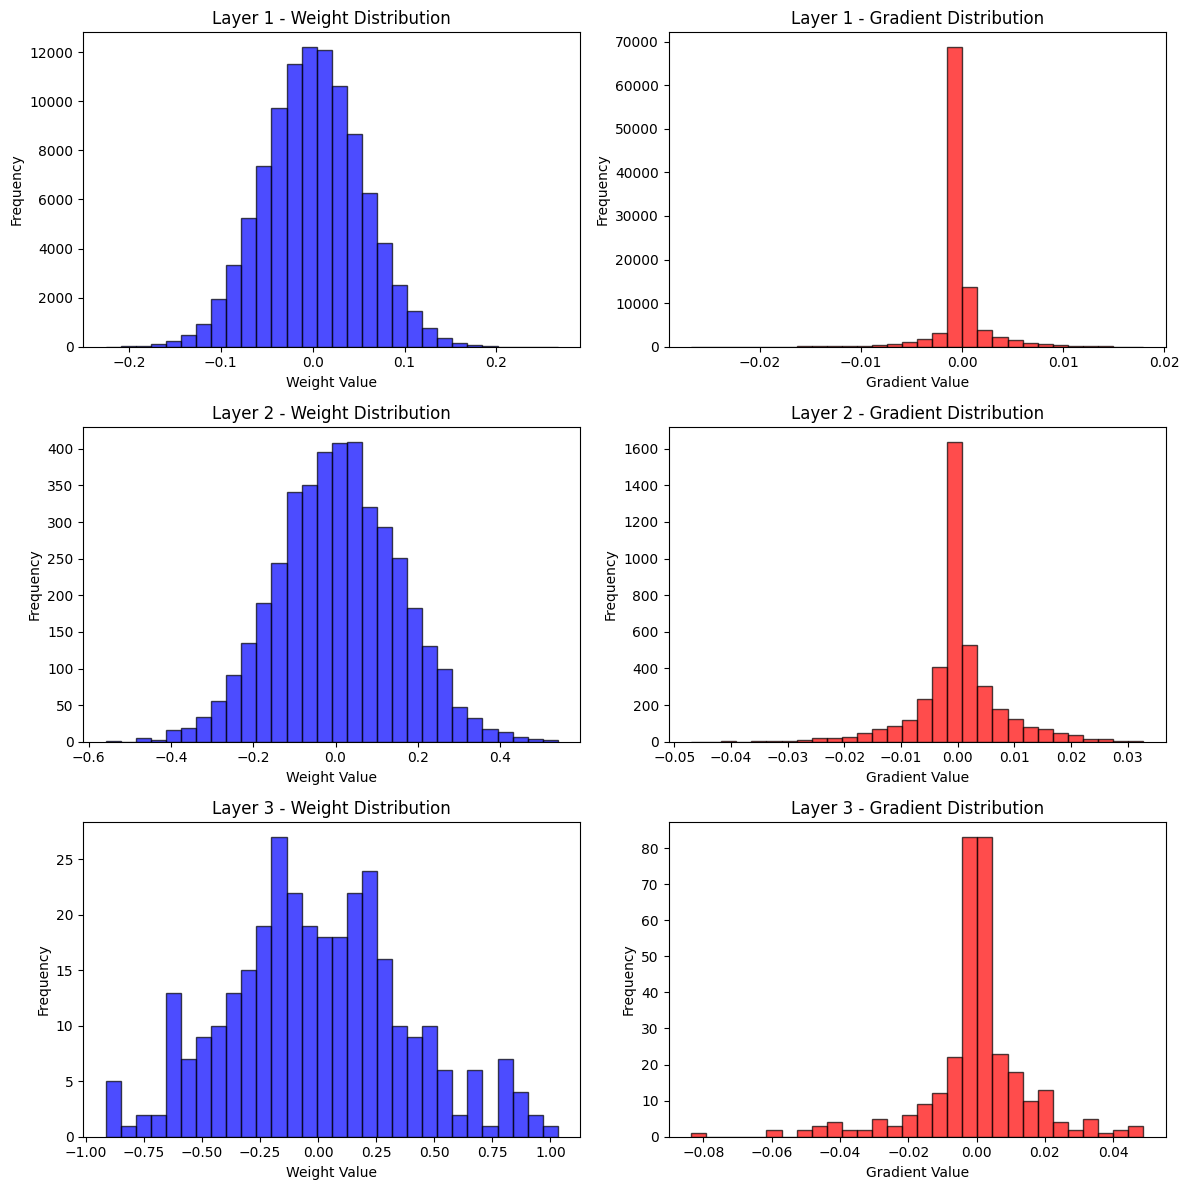

Weight and gradient distribution for learning rate: 0.1


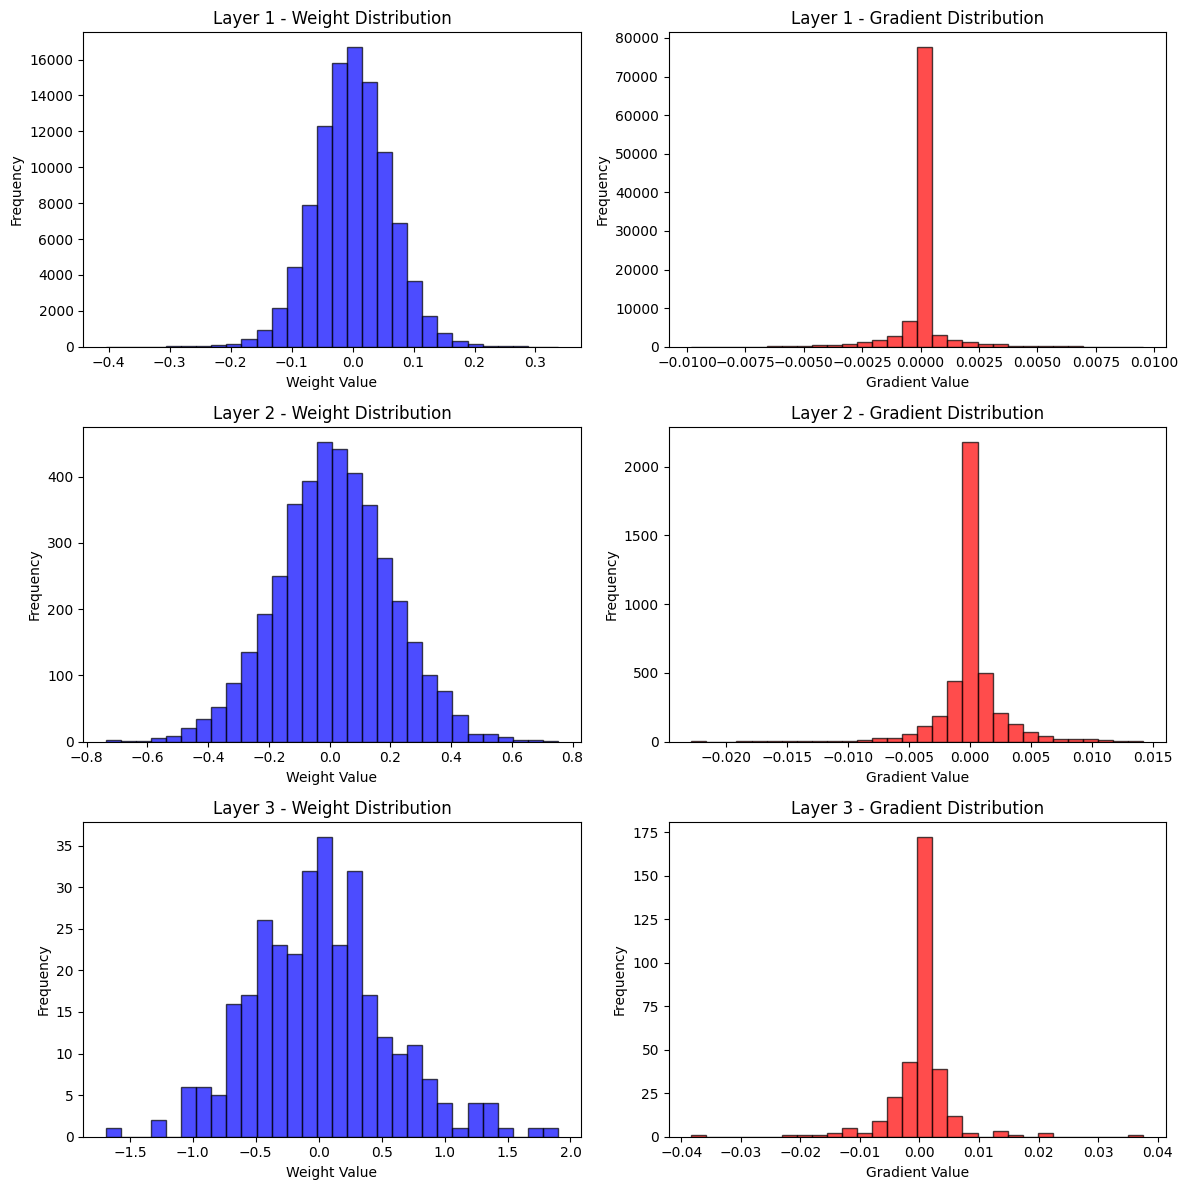

In [9]:
learning_rates = [0.001, 0.01, 0.1]

models = []
training_histories = []
accuracies = []

for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    
    # Define model architecture (same for all)
    layers = [
        Layer(784, 128, activation=relu, weight_init=he_init),
        Layer(128, 32, activation=relu, weight_init=he_init),
        Layer(32, 10, activation=softmax, weight_init=he_init)
    ]

    model = FFNN(layers=layers, loss_fn=cce_loss, lr=lr)
    
    training_history = model.train(
        training_data=X_train,
        training_target=y_train,
        max_epoch=20,
        error_threshold=0.01,
        batch_size=64,
        validation_data=X_val,
        validation_target=y_val,
        verbose=False
    )

    models.append(model)
    training_histories.append(training_history)

    pred = model(X_val)
    pred = np.argmax(pred.data, axis=1)
    y_val_decoded = np.argmax(y_val.data, axis=1)
    
    accuracy = accuracy_score(y_val_decoded, pred)
    accuracies.append(accuracy)
    
    print(f"Accuracy for lr={lr}: {accuracy * 100:.2f}%\n")

plt.figure(figsize=(10, 6))

for i, lr in enumerate(learning_rates):
    plt.plot(training_histories[i]['training_loss_history'], label=f'Train Loss (lr={lr})')
    plt.plot(training_histories[i]['validation_loss_history'], linestyle='--', label=f'Val Loss (lr={lr})')

plt.title('Training Loss Comparison for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

for i, model in enumerate(models):
    print(f"Weight and gradient distribution for learning rate: {learning_rates[i]}")
    plot_weight_distribution(model)

Training model with weight initialization: zero_init
Accuracy for zero_init: 11.43%

Training model with weight initialization: uniform_init
Accuracy for uniform_init: 89.06%

Training model with weight initialization: normal_init
Accuracy for normal_init: 61.60%

Training model with weight initialization: he_init
Accuracy for he_init: 96.08%

Training model with weight initialization: xavier_init
Accuracy for xavier_init: 96.11%



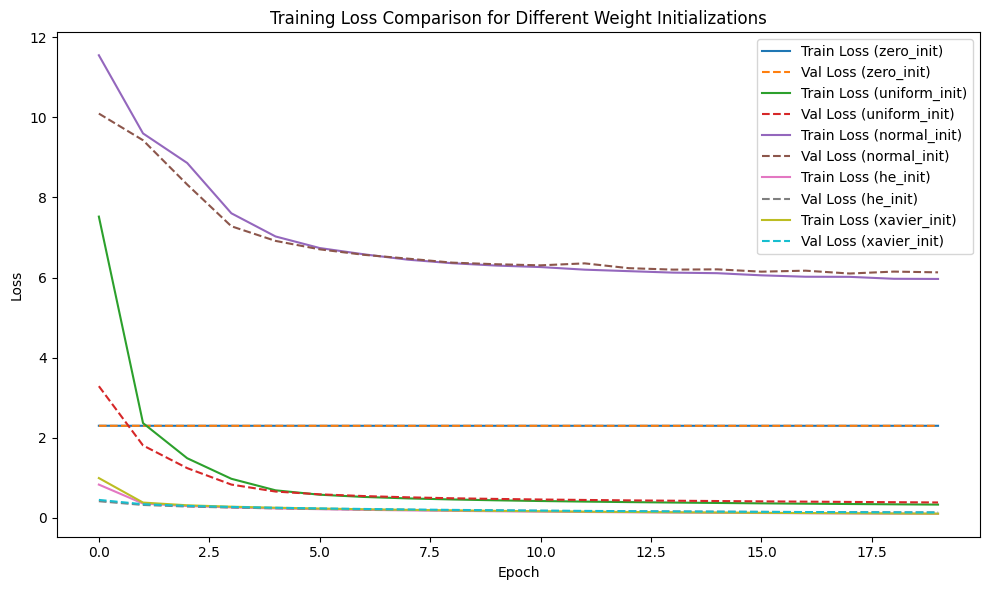

Weight and gradient distribution for weight initialization: zero_init


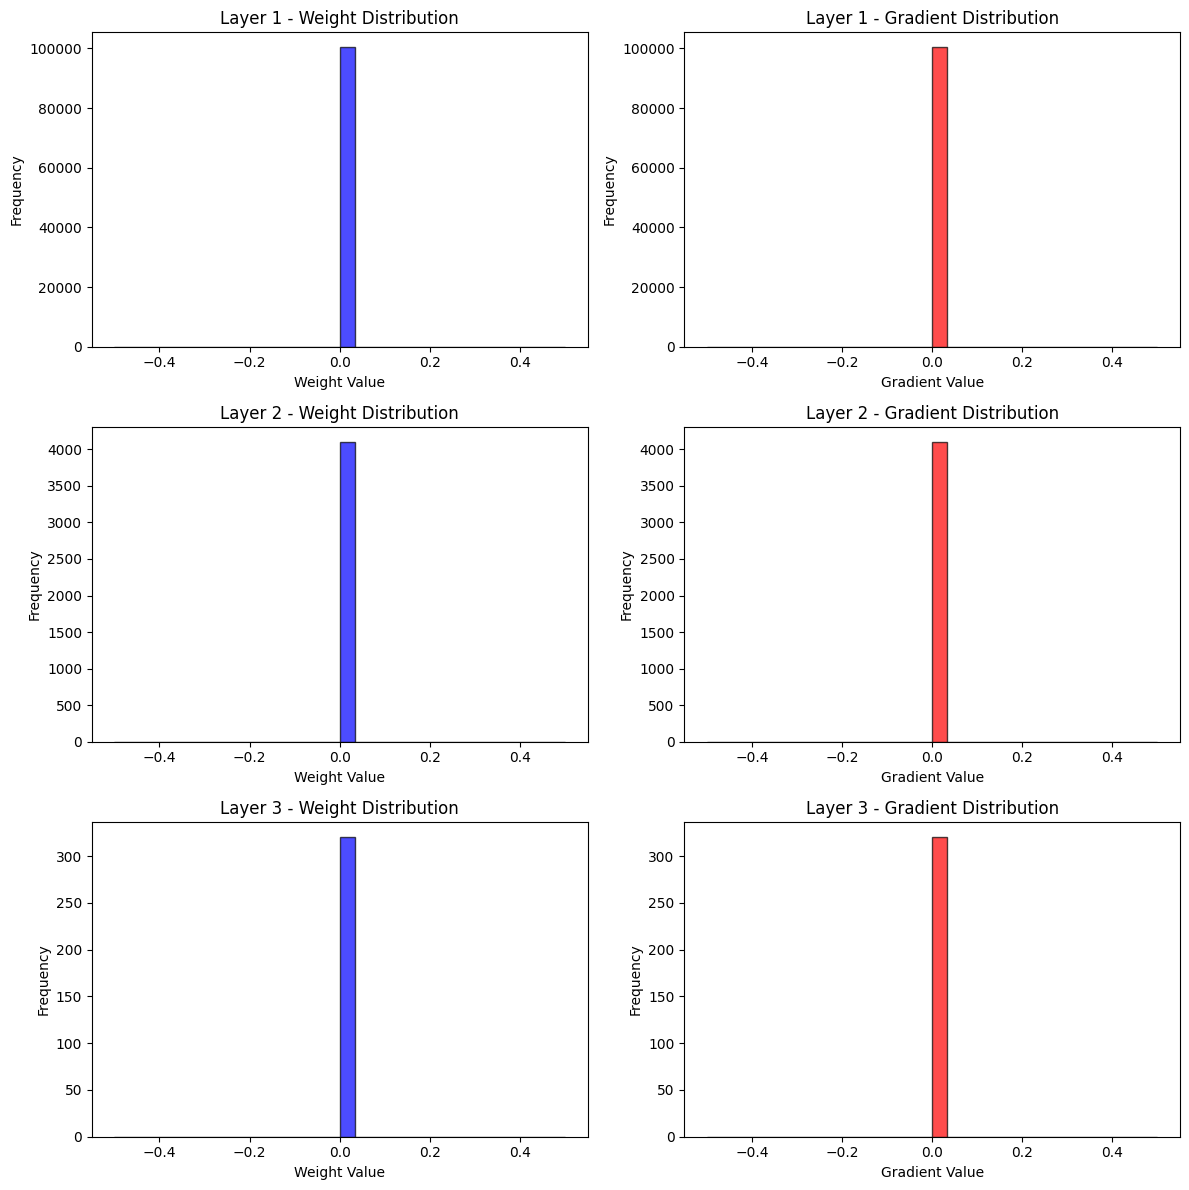

Weight and gradient distribution for weight initialization: uniform_init


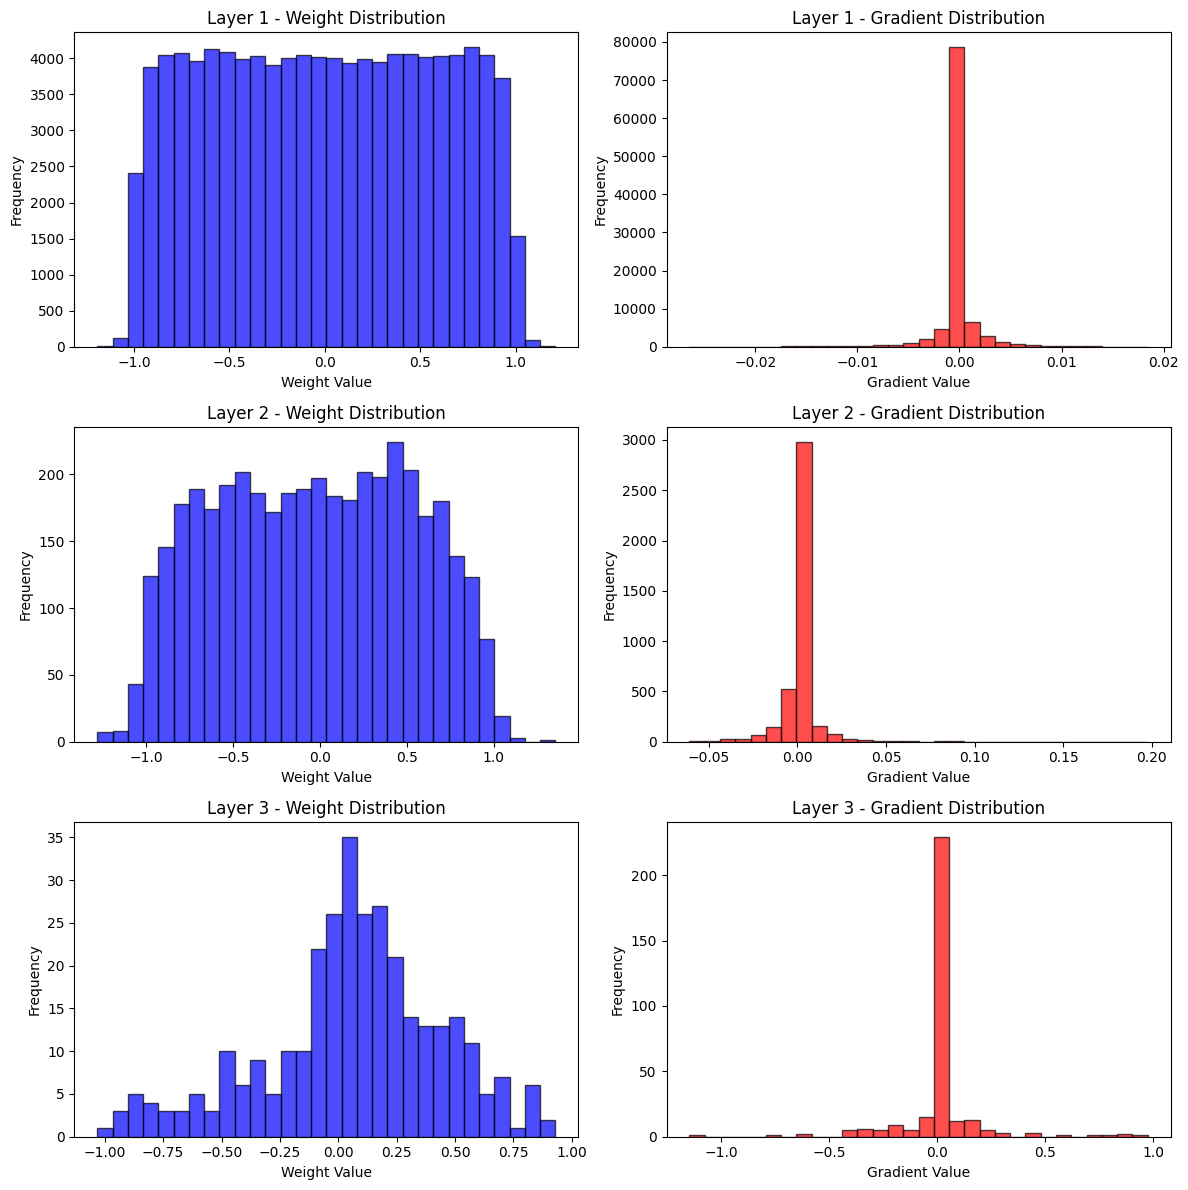

Weight and gradient distribution for weight initialization: normal_init


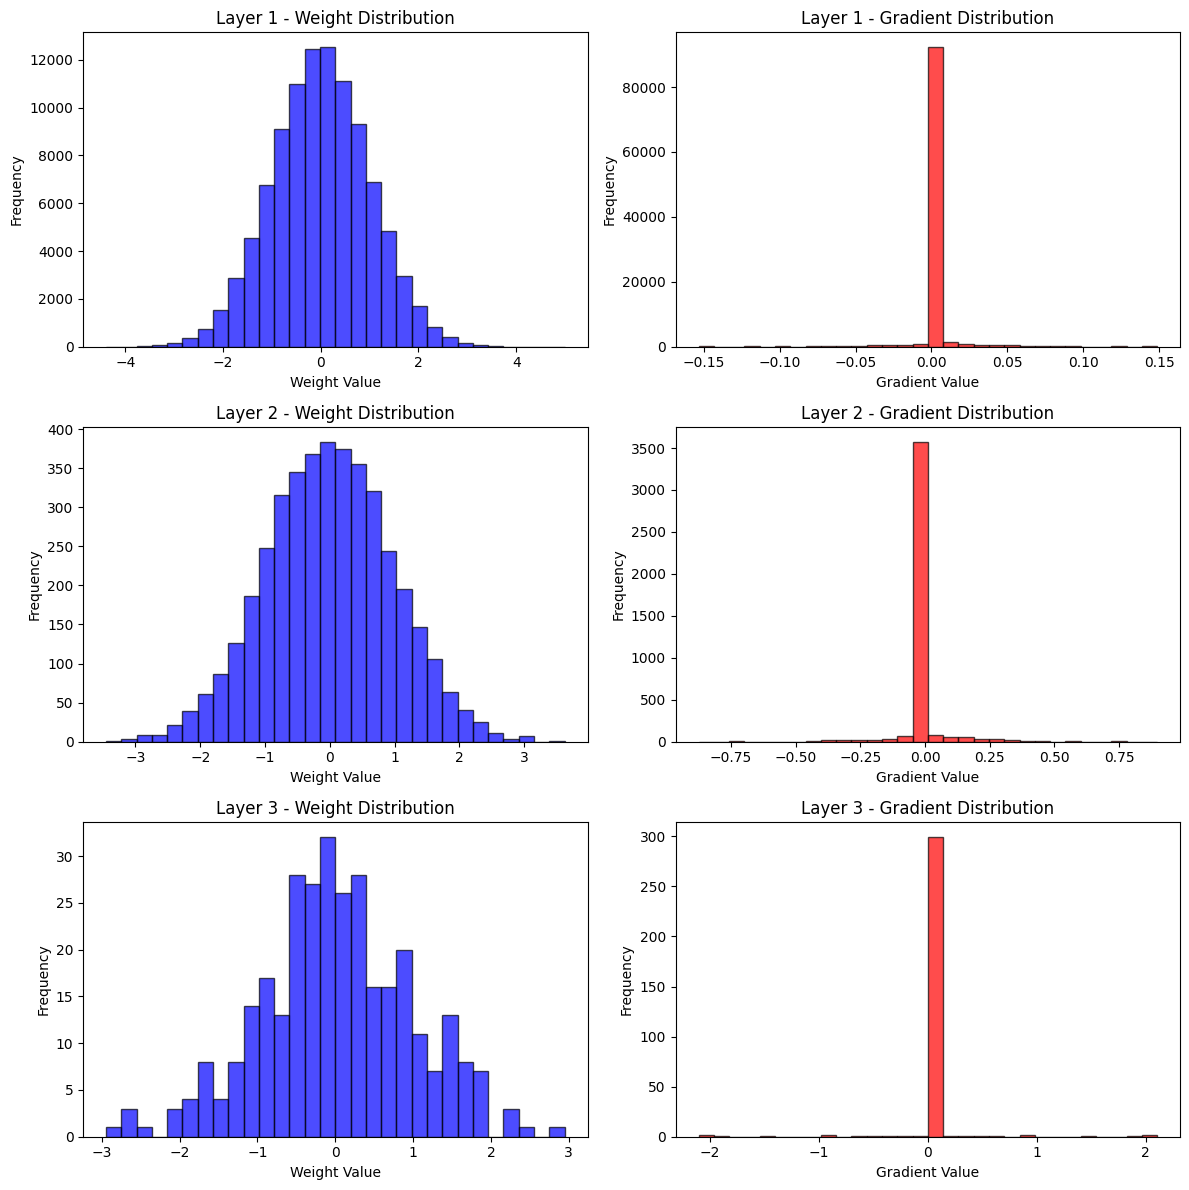

Weight and gradient distribution for weight initialization: he_init


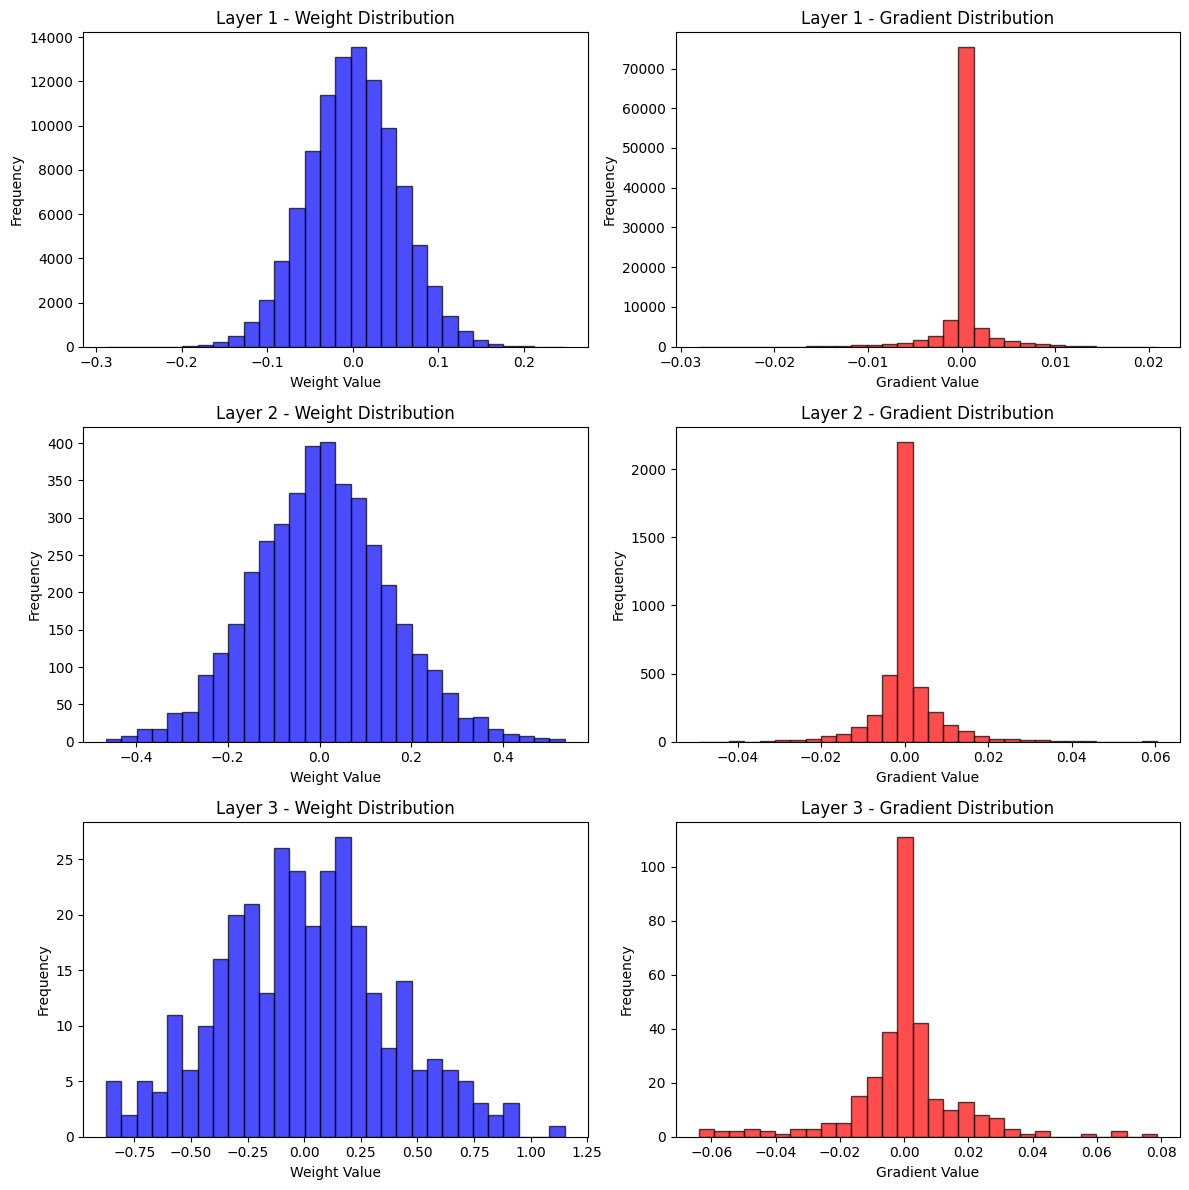

Weight and gradient distribution for weight initialization: xavier_init


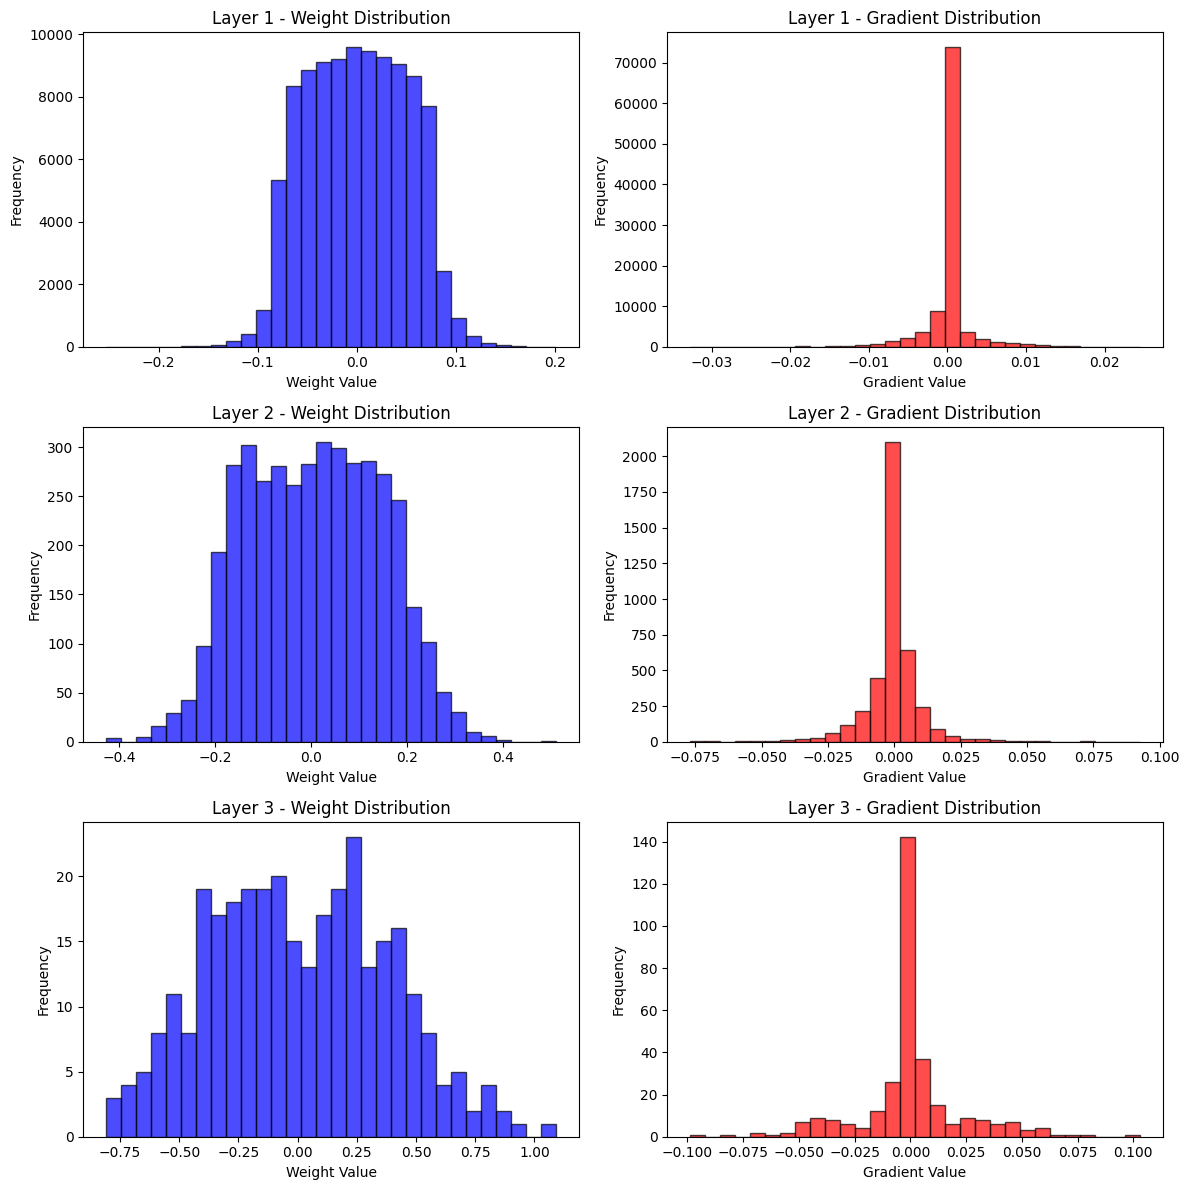

In [12]:
weight_init_methods = {
    "zero_init": zero_init,
    "uniform_init": uniform_init,
    "normal_init": normal_init,
    "he_init": he_init,
    "xavier_init": xavier_init
}

models = []
training_histories = []
accuracies = []

for name, weight_init in weight_init_methods.items():
    print(f"Training model with weight initialization: {name}")
    
    layers = [
        Layer(784, 128, activation=relu, weight_init=weight_init),
        Layer(128, 32, activation=relu, weight_init=weight_init),
        Layer(32, 10, activation=softmax, weight_init=weight_init)
    ]

    model = FFNN(layers=layers, loss_fn=cce_loss, lr=0.01)
    
    training_history = model.train(
        training_data=X_train,
        training_target=y_train,
        max_epoch=20,
        error_threshold=0.01,
        batch_size=64,
        validation_data=X_val,
        validation_target=y_val,
        verbose=False
    )

    models.append(model)
    training_histories.append(training_history)

    pred = model(X_val)
    pred = np.argmax(pred.data, axis=1)
    y_val_decoded = np.argmax(y_val.data, axis=1)
    
    accuracy = accuracy_score(y_val_decoded, pred)
    accuracies.append(accuracy)
    
    print(f"Accuracy for {name}: {accuracy * 100:.2f}%\n")

plt.figure(figsize=(10, 6))

for i, name in enumerate(weight_init_methods.keys()):
    plt.plot(training_histories[i]['training_loss_history'], label=f'Train Loss ({name})')
    plt.plot(training_histories[i]['validation_loss_history'], linestyle='--', label=f'Val Loss ({name})')

plt.title('Training Loss Comparison for Different Weight Initializations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

for i, model in enumerate(models):
    print(f"Weight and gradient distribution for weight initialization: {list(weight_init_methods.keys())[i]}")
    plot_weight_distribution(model)

Training model Without RMSNorm
Accuracy Without RMSNorm: 96.08%

Training model With RMSNorm
Accuracy With RMSNorm: 51.71%



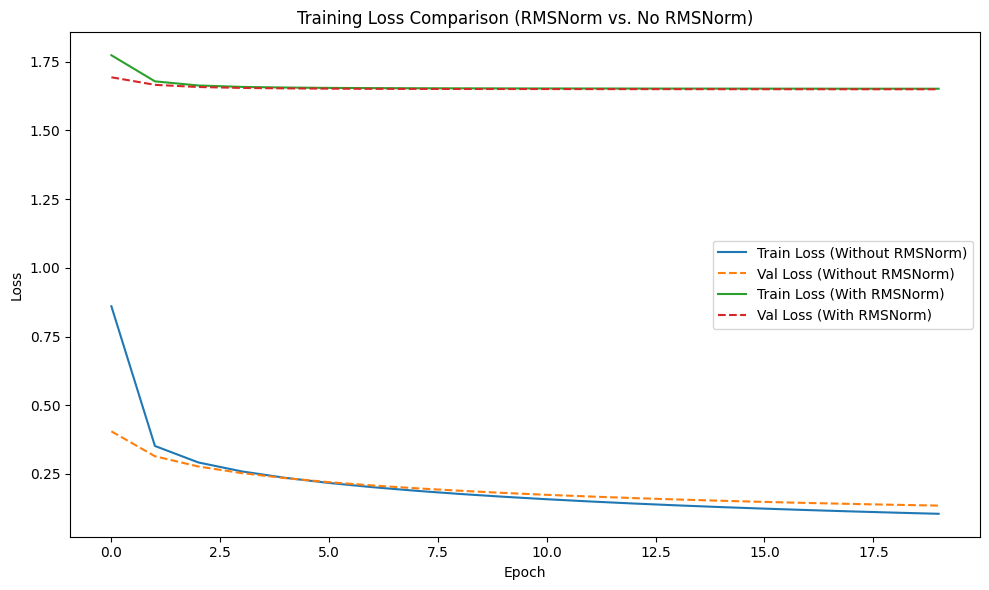

Weight and gradient distribution: Without RMSNorm


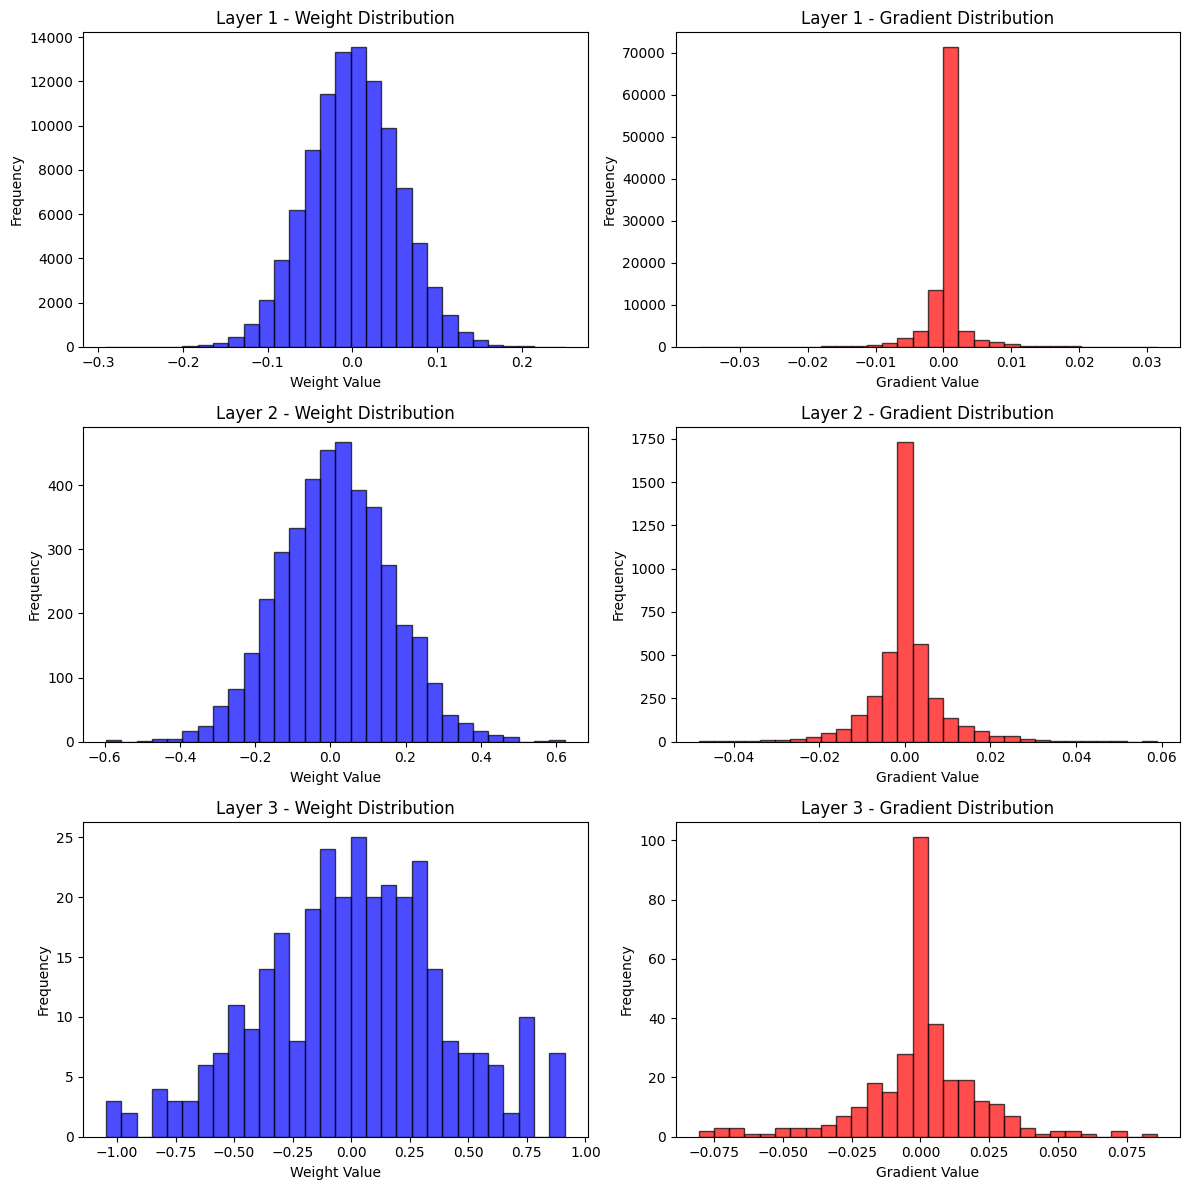

Weight and gradient distribution: With RMSNorm


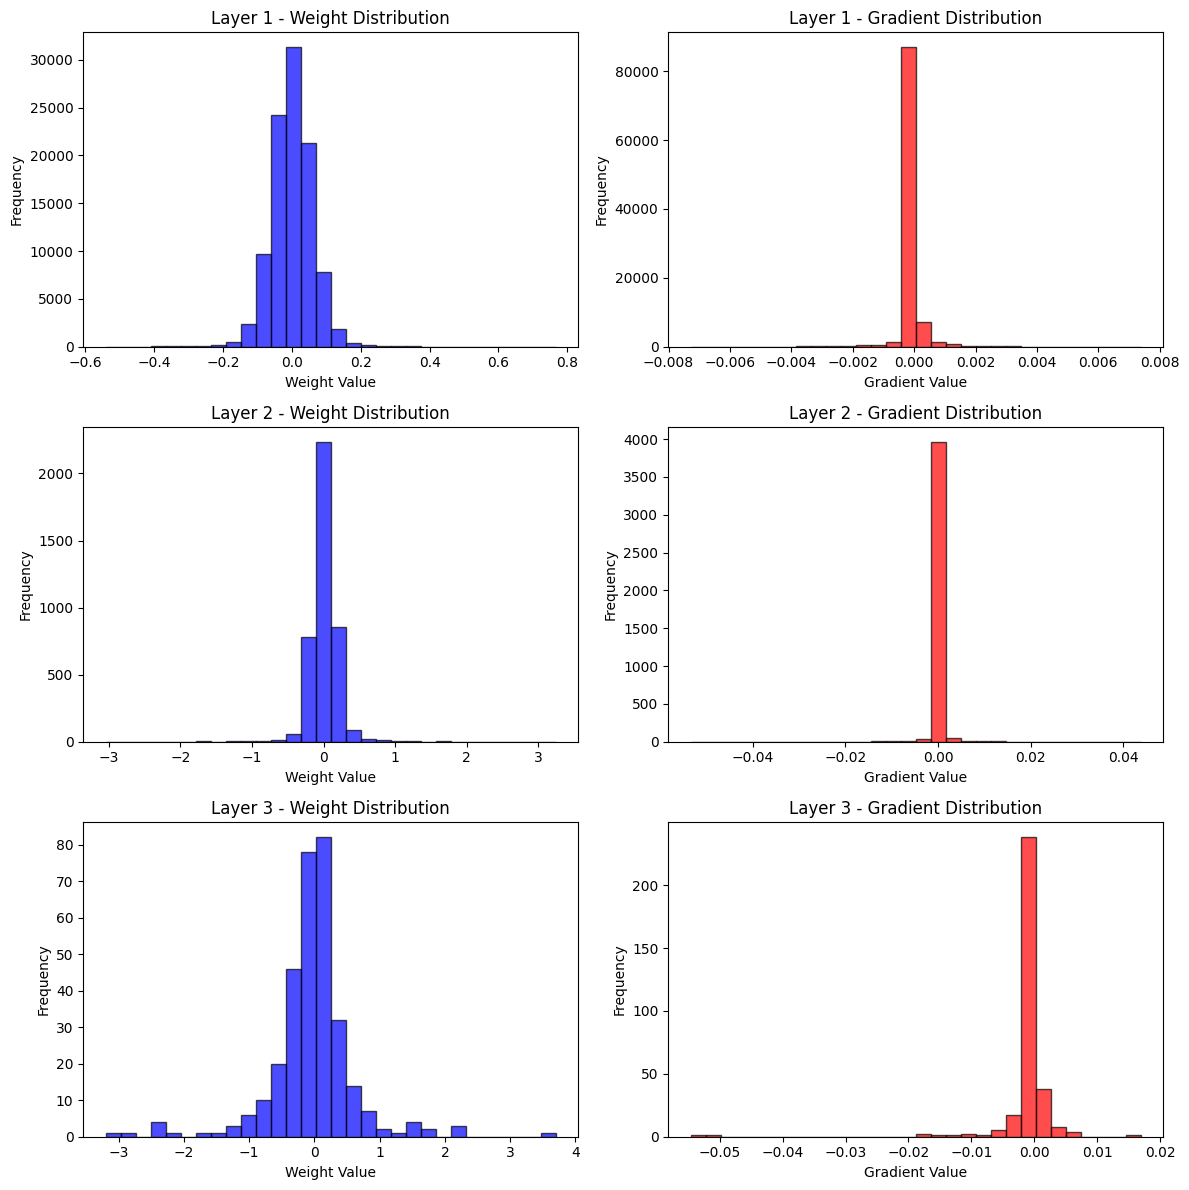

In [14]:
models = []
training_histories = []
accuracies = []

for use_rmsnorm in [False, True]:
    label = "With RMSNorm" if use_rmsnorm else "Without RMSNorm"
    print(f"Training model {label}")

    layers = [
        Layer(784, 128, activation=relu, weight_init=he_init, rmsnorm=use_rmsnorm),
        Layer(128, 32, activation=relu, weight_init=he_init, rmsnorm=use_rmsnorm),
        Layer(32, 10, activation=softmax, weight_init=he_init, rmsnorm=use_rmsnorm),
    ]

    model = FFNN(layers=layers, loss_fn=cce_loss, lr=0.01)

    training_history = model.train(
        training_data=X_train,
        training_target=y_train,
        max_epoch=20,
        error_threshold=0.01,
        batch_size=64,
        validation_data=X_val,
        validation_target=y_val,
        verbose=False
    )

    models.append(model)
    training_histories.append(training_history)

    pred = model(X_val)
    pred = np.argmax(pred.data, axis=1)
    y_val_decoded = np.argmax(y_val.data, axis=1)

    accuracy = accuracy_score(y_val_decoded, pred)
    accuracies.append(accuracy)

    print(f"Accuracy {label}: {accuracy * 100:.2f}%\n")

plt.figure(figsize=(10, 6))

for i, label in enumerate(["Without RMSNorm", "With RMSNorm"]):
    plt.plot(training_histories[i]['training_loss_history'], label=f'Train Loss ({label})')
    plt.plot(training_histories[i]['validation_loss_history'], linestyle='--', label=f'Val Loss ({label})')

plt.title('Training Loss Comparison (RMSNorm vs. No RMSNorm)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

for i, model in enumerate(models):
    print(f"Weight and gradient distribution: {'With RMSNorm' if i else 'Without RMSNorm'}")
    plot_weight_distribution(model)

Training model with No Regularization
Accuracy No Regularization: 96.13%

Training model with L1 Regularization
Accuracy L1 Regularization: 95.84%

Training model with L2 Regularization
Accuracy L2 Regularization: 95.68%

Training model with L1 + L2 Regularization
Accuracy L1 + L2 Regularization: 95.34%



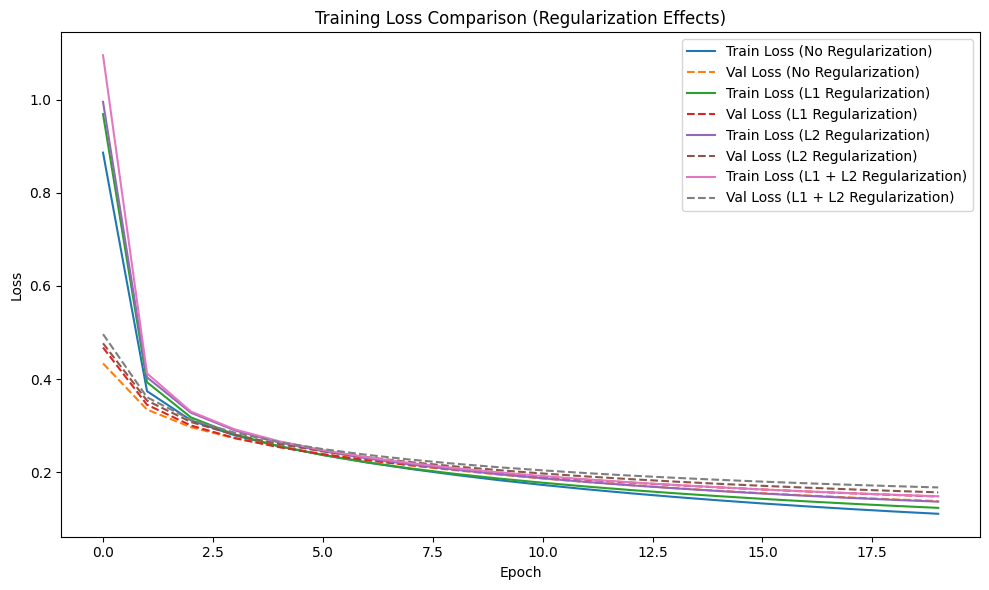

Weight and gradient distribution: No Regularization


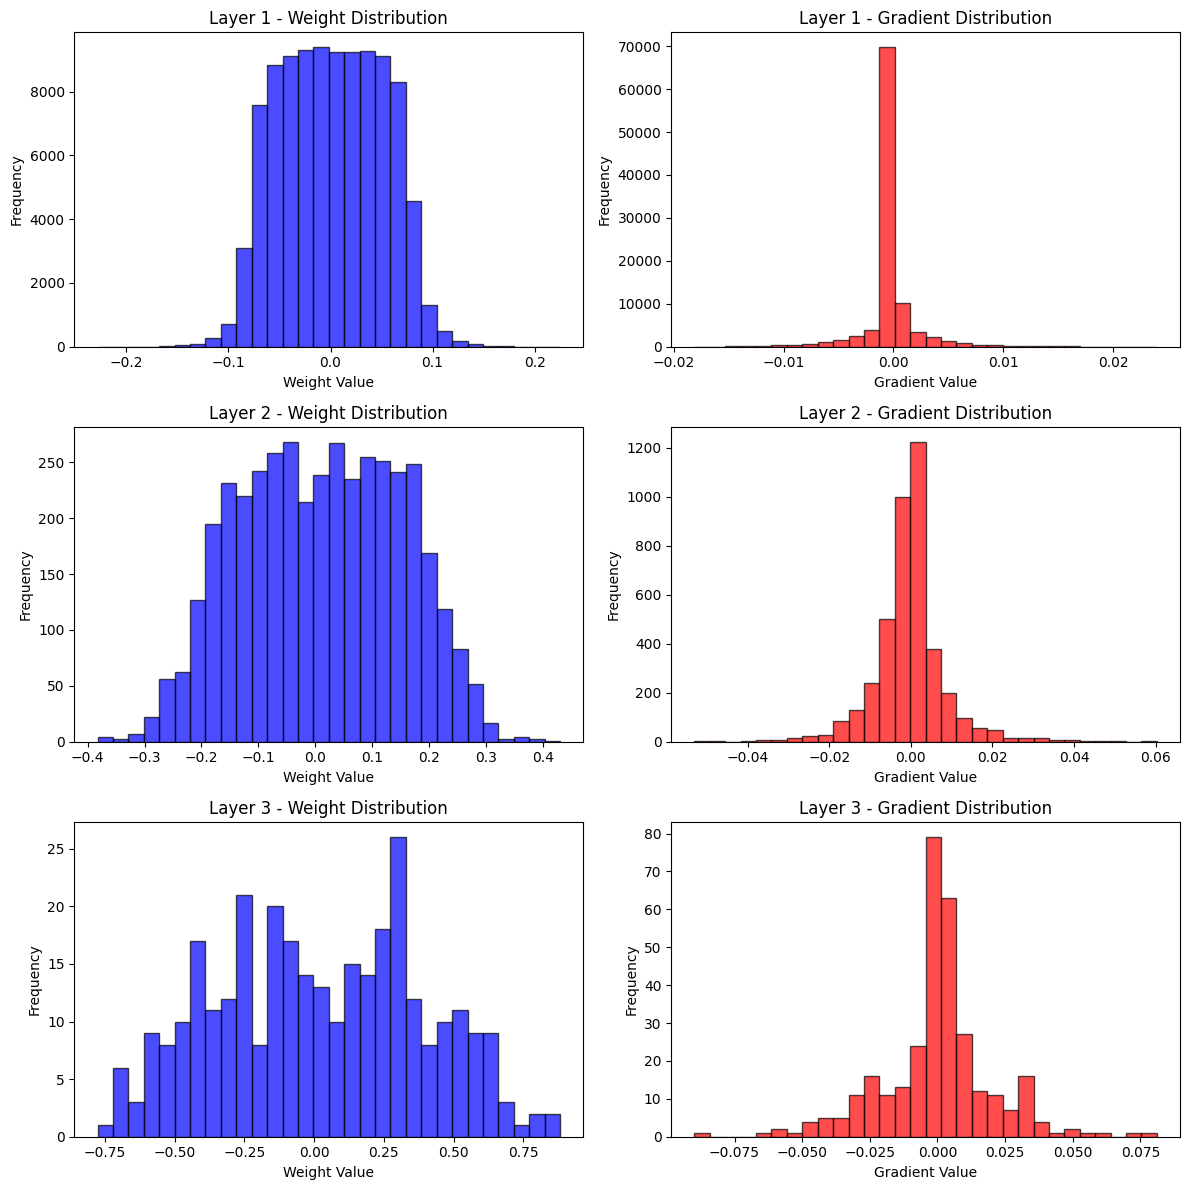

Weight and gradient distribution: L1 Regularization


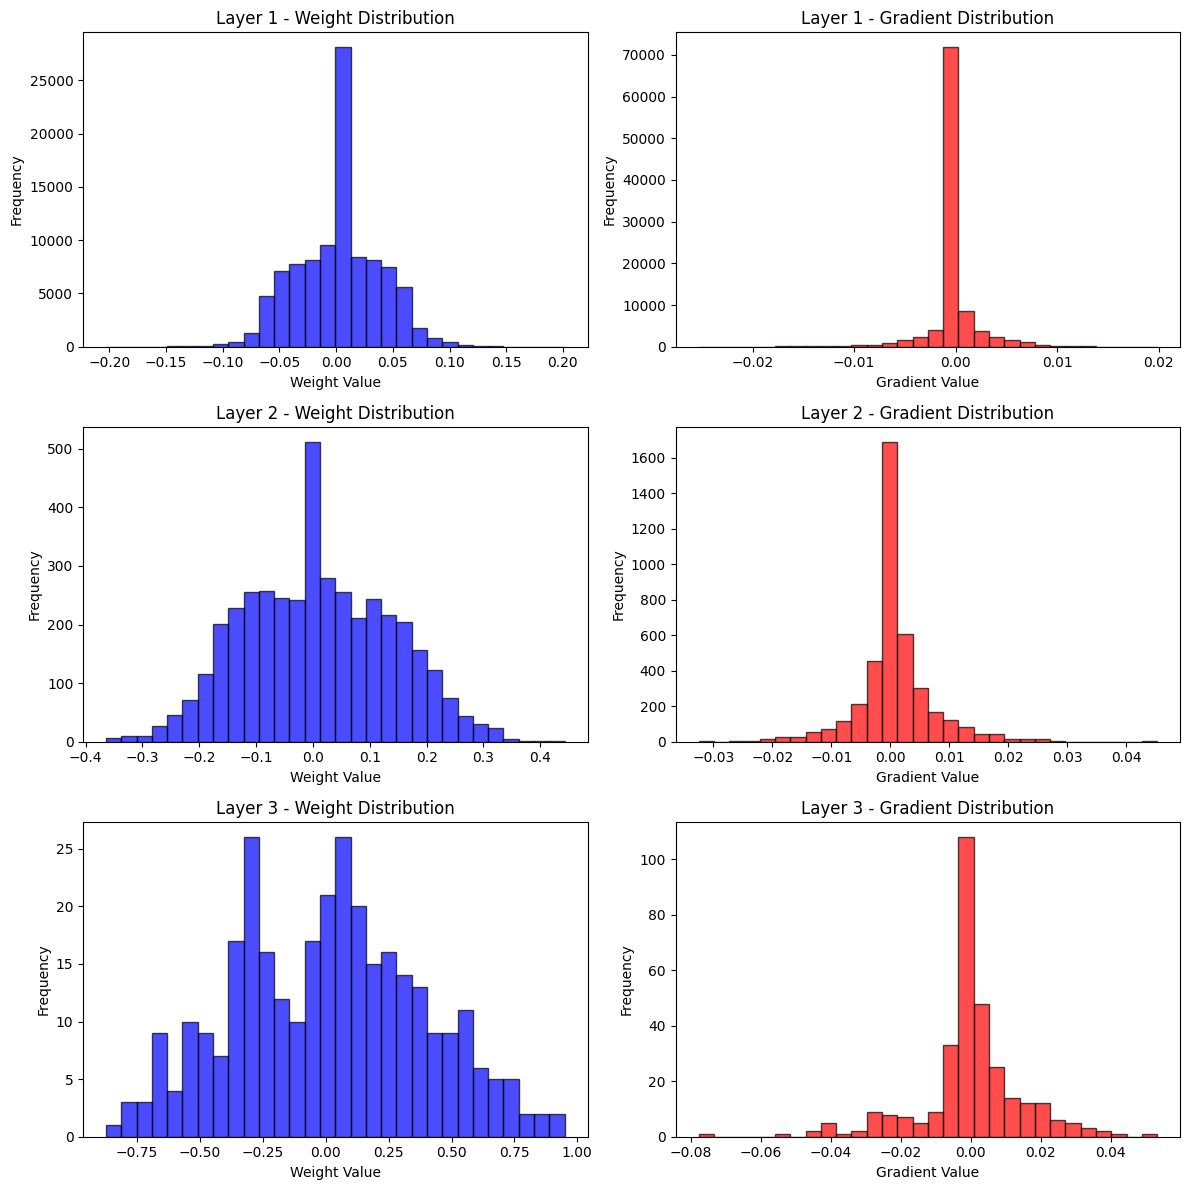

Weight and gradient distribution: L2 Regularization


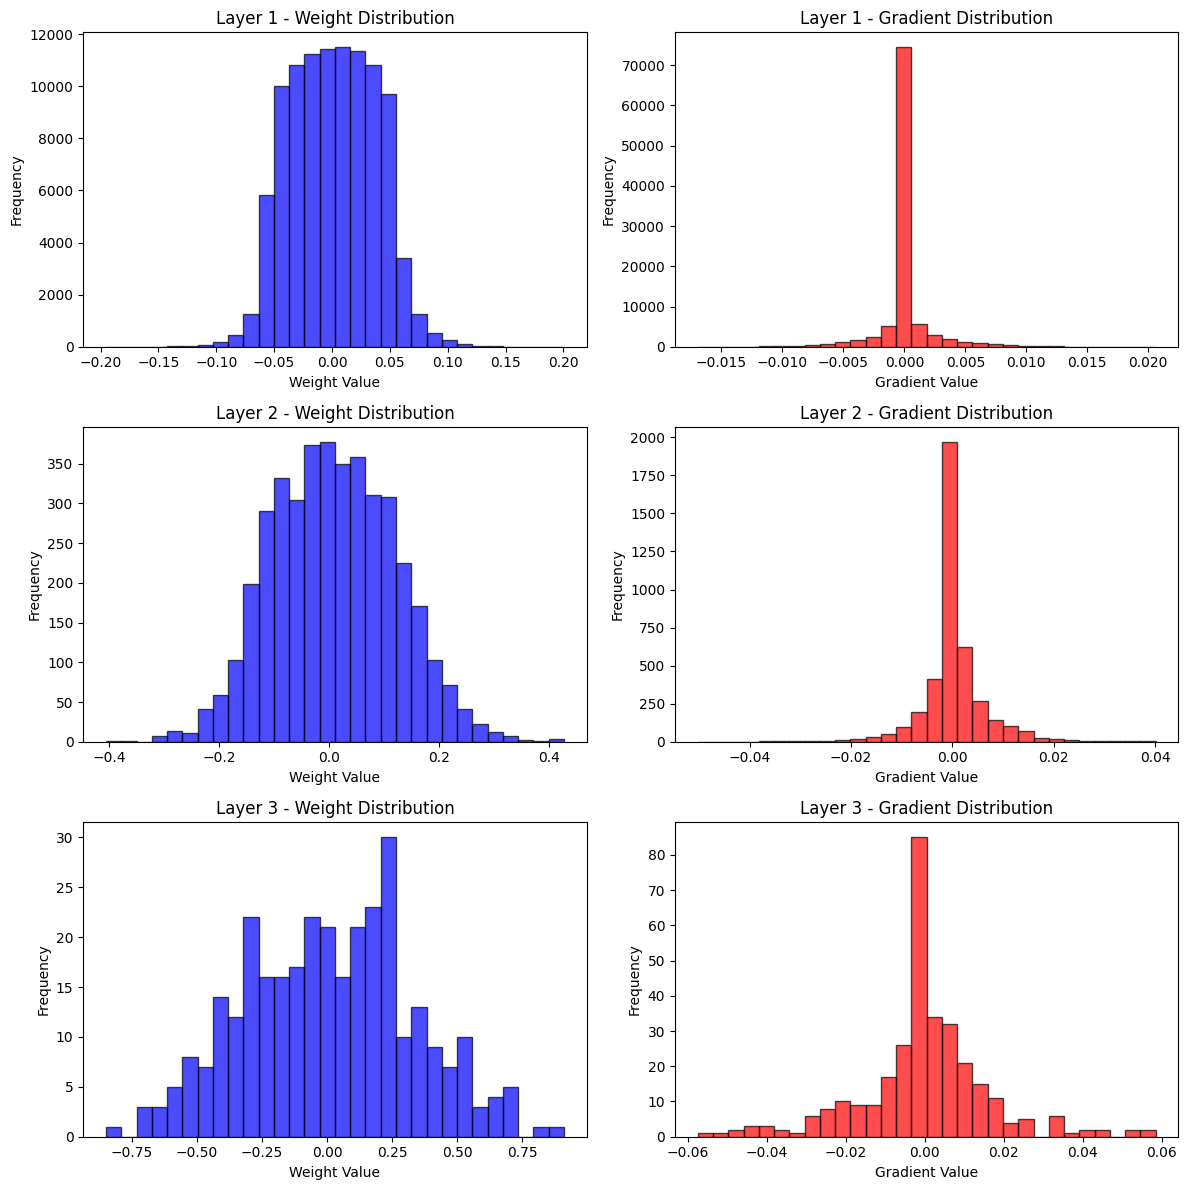

Weight and gradient distribution: L1 + L2 Regularization


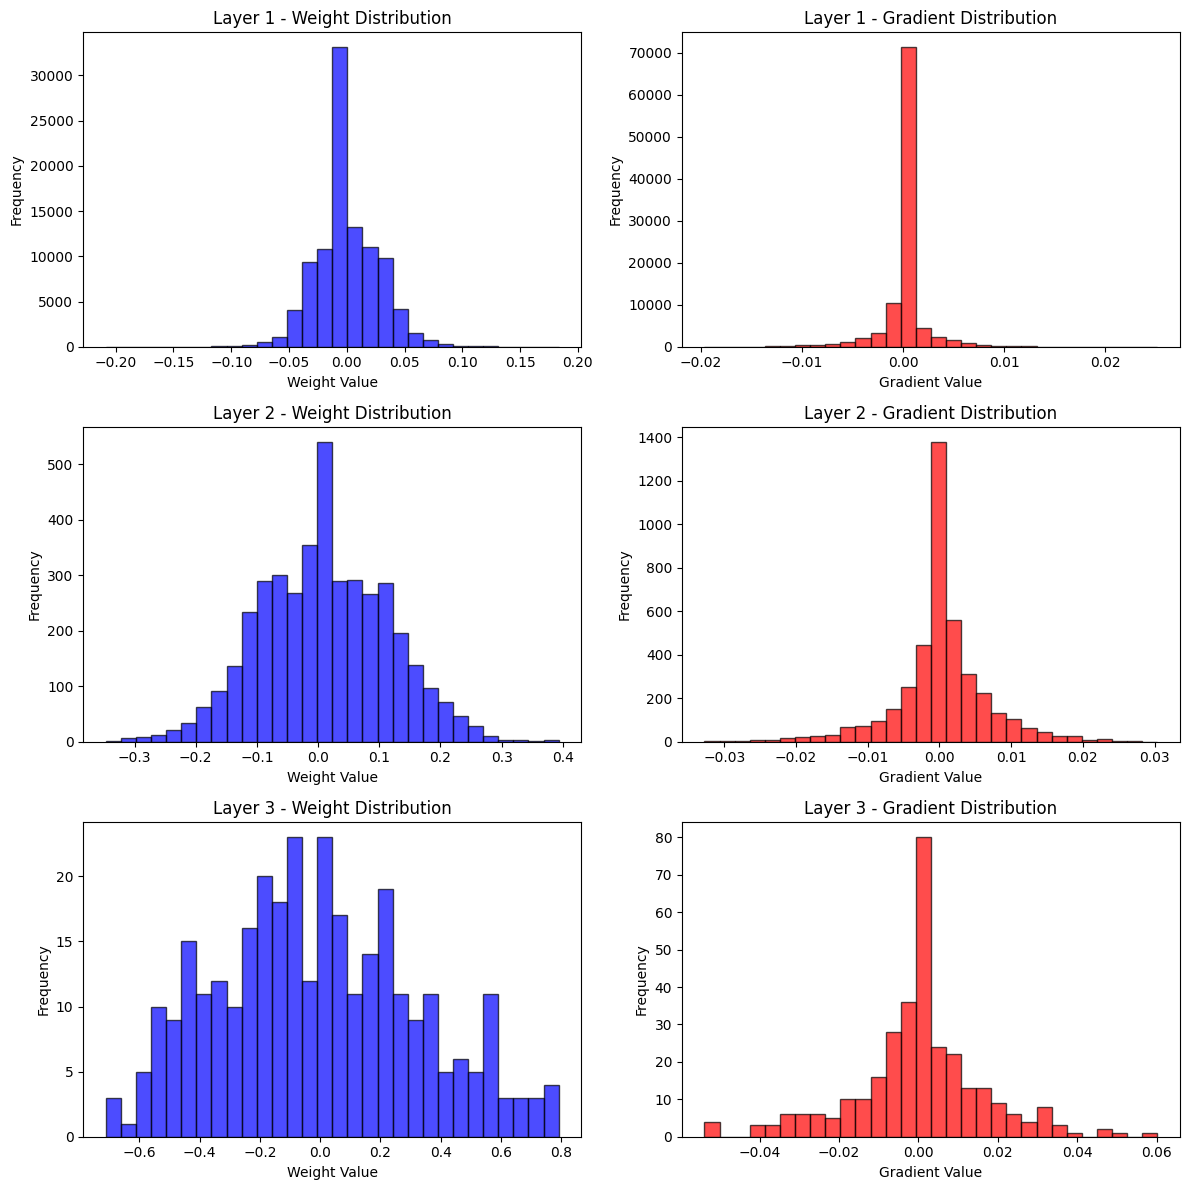

In [3]:
models = []
training_histories = []
accuracies = []

lambda_l1 = 0.0001
lambda_l2 = 0.001

regularization_settings = [
    {"lambda_l1": 0, "lambda_l2": 0, "label": "No Regularization"},
    {"lambda_l1": lambda_l1, "lambda_l2": 0, "label": "L1 Regularization"},
    {"lambda_l1": 0, "lambda_l2": lambda_l2, "label": "L2 Regularization"},
    {"lambda_l1": lambda_l1, "lambda_l2": lambda_l2, "label": "L1 + L2 Regularization"},
]

for reg in regularization_settings:
    print(f"Training model with {reg['label']}")

    layers = [
        Layer(784, 128, activation=leaky_relu, weight_init=xavier_init),
        Layer(128, 32, activation=leaky_relu, weight_init=xavier_init),
        Layer(32, 10, activation=softmax, weight_init=xavier_init),
    ]

    model = FFNN(
        layers=layers, 
        loss_fn=cce_loss, 
        lr=0.01, 
        lambda_l1=reg["lambda_l1"], 
        lambda_l2=reg["lambda_l2"]
    )

    training_history = model.train(
        training_data=X_train,
        training_target=y_train,
        max_epoch=20,
        error_threshold=0.01,
        batch_size=64,
        validation_data=X_val,
        validation_target=y_val,
        verbose=False
    )

    models.append(model)
    training_histories.append(training_history)

    pred = model(X_val)
    pred = np.argmax(pred.data, axis=1)
    y_val_decoded = np.argmax(y_val.data, axis=1)

    accuracy = accuracy_score(y_val_decoded, pred)
    accuracies.append(accuracy)

    print(f"Accuracy {reg['label']}: {accuracy * 100:.2f}%\n")

plt.figure(figsize=(10, 6))

for i, reg in enumerate(regularization_settings):
    plt.plot(training_histories[i]['training_loss_history'], label=f'Train Loss ({reg["label"]})')
    plt.plot(training_histories[i]['validation_loss_history'], linestyle='--', label=f'Val Loss ({reg["label"]})')

plt.title('Training Loss Comparison (Regularization Effects)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

for i, model in enumerate(models):
    print(f"Weight and gradient distribution: {regularization_settings[i]['label']}")
    plot_weight_distribution(model)

In [21]:
# Comparison with sklearn

layers = [
    Layer(784, 128, activation=leaky_relu, weight_init=xavier_init),
    Layer(128, 32, activation=leaky_relu, weight_init=xavier_init),
    Layer(32, 10, activation=softmax, weight_init=xavier_init),
]

ffnn = FFNN(layers=layers, loss_fn=cce_loss, lr=0.01)

print("Training FFNN...")
ffnn_history = ffnn.train(
    training_data=X_train,
    training_target=y_train,
    max_epoch=20,
    error_threshold=0.01,
    batch_size=64,
    validation_data=X_val,
    validation_target=y_val,
    verbose=True
)

ffnn_pred = ffnn(X_val)
ffnn_pred = np.argmax(ffnn_pred.data, axis=1)
y_val_decoded = np.argmax(y_val.data, axis=1)

ffnn_accuracy = accuracy_score(y_val_decoded, ffnn_pred)
print(f"FFNN Accuracy: {ffnn_accuracy * 100:.2f}%\n")

Training FFNN...
Epoch 1/20: Training Loss = 0.9181168290206364, Validation Loss = 0.4594687578623982
Epoch 2/20: Training Loss = 0.3918276830911636, Validation Loss = 0.34605283424347855
Epoch 3/20: Training Loss = 0.32028649483408245, Validation Loss = 0.30377601806923604
Epoch 4/20: Training Loss = 0.284897225354399, Validation Loss = 0.2780425335703781
Epoch 5/20: Training Loss = 0.26036051319326675, Validation Loss = 0.2586071390579967
Epoch 6/20: Training Loss = 0.2405673486462661, Validation Loss = 0.24236331558228777
Epoch 7/20: Training Loss = 0.22361204370856286, Validation Loss = 0.22834366799469766
Epoch 8/20: Training Loss = 0.20880782236371723, Validation Loss = 0.21622362502694278
Epoch 9/20: Training Loss = 0.19574350798555784, Validation Loss = 0.20550324812162857
Epoch 10/20: Training Loss = 0.18414360058307647, Validation Loss = 0.19619241739388407
Epoch 11/20: Training Loss = 0.17381748618824142, Validation Loss = 0.1880097109264656
Epoch 12/20: Training Loss = 0.16

In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 32),
    activation='relu',
    solver='sgd',
    learning_rate='constant',
    learning_rate_init=0.01,
    batch_size=64,
    max_iter=20,
    random_state=42
)

print("Training Scikit-learn MLP...")
mlp.fit(X_train.data, np.argmax(y_train.data, axis=1))

mlp_pred = mlp.predict(X_val.data)

mlp_accuracy = accuracy_score(y_val_decoded, mlp_pred)
print(f"MLP Accuracy: {mlp_accuracy * 100:.2f}%\n")

Training Scikit-learn MLP...
MLP Accuracy: 97.83%



c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
print("Comparison of Final Accuracy:")
print(f"FFNN Accuracy: {ffnn_accuracy * 100:.2f}%")
print(f"Scikit-learn MLP Accuracy: {mlp_accuracy * 100:.2f}%")

if ffnn_accuracy > mlp_accuracy:
    print("\nFFNN outperforms Scikit-learn MLP!")
elif ffnn_accuracy < mlp_accuracy:
    print("\nScikit-learn MLP outperforms FFNN.")
else:
    print("\nBoth models perform equally.")

Comparison of Final Accuracy:
FFNN Accuracy: 95.94%
Scikit-learn MLP Accuracy: 97.83%

Scikit-learn MLP outperforms FFNN.
